# 1550 Calibration Analysis

## Instrument Matrix Analysis
The instrument matrix tells us how stokes parameters map measurements in the polarimeter. Therefore, we should be able to solve for the actual projection axes of the device. I have attempted to do this by arguing that if the input polarization state correponds to the one of the basis states measured by the detector 1,2 pair, then one of these detectors will be zeroed. If the other basis state in this pair is the input, the other detector will be zeroed. When written as stokes vectors, the 2 basis states are written as anti-parallel vectors. In additon, we know that these input states can be treated as normalized in the stokes sense, aka S0 = 1, and in the conventional sense, |(S1,S2,S3)|=1. This gives us 3 equations and 3 unknowns to solve for the (S1,S2,S3) basis state. 
### Questions
What does the description of a PBS look like in Stokes space. Its strange to me orthogonal polarization states in the Jones descriptions are anti-parallel in the Stokes description. 

Why did the 7 detector DOP study give me an unphysical linear combo for S0?
## Preliminary Results
Using mathematica, I used the above constraints and the fitted instrument matrix to solve for the basis states. The resulting stokes parameters are complex so I'm confused. Is this a result of having a fitted instrument matrix and not some exact matrix? Is there some interpretation of complex stokes parameters? Can I still examine how orthogonal they are? Perhaps I can't use the (S1,S2,S3)|=1 condition since I know that the DOP varies wildly, especially for elliptical states. 
### Further Thoughts
On further thinking, I believe I understand the situation better. If detector 1 gives us a signal that is proportional to the projection onto some polarization state, then a zeroed reading from this detector means the input state has not overlap with this projection axis. Therefore, they are orthogonal. Since our polarization states live in C^2, we can solve for the projection axis by finding the orthogonal input state.
As stated above, there are sevearl constraints we can place based on the instrument matrix and the properties of stokes vectors. The constraint that an input state must map through the instrument matrix to zero a detector gives us a plane in stokes space so, combining with the constraint that (S1,S2,S3)|=1 gives us 3 possibilities for the solutions set. If the plane doesn't intersect the unit sphere, then we have no solutions. If the plane is tangent to 1 point, then we get a unique solution. If the plane cuts through the interior of the circle, then there is a ring/ellipse of solutions. Going forward I want to look at these solution sets for detector 1 and 2 seperately because there may not be an intersection. This may be because the projections for detector 1 and 2 are not completely orthogonal. In any case, looking at these will be interesting. One method could be to find the normal vector to the tangent plane from the origin. This would give me the directionality of what a stokes vector solution should look like. Also, once I figure out what is really going on with these solution sets, I should try and attribute physical meaning to the discrepancy from the ideal case of the planes being both tanget, and also reflected about the origin. 

## Circular Scaling Issue
Its obvious that something is wrong with the calibration matrix that maps the measurements into S3. It is easy to generate an S3 value above unity which isn't good but not that suprising. What is more suprising is that when the calibration matrix is applied to the states used for circular calibration, the S3 value is ~1.6. This doesn't make alot of sense to me because the matrix was constructed to map these states to LH and RH. A thought did occur to me which is probably related to this issue in some manner. I used a circular polarizer to generate a quasi circular state. After rotating the polarizer by 90 degrees(physical space) I generated the state corresponding to the initial quasi circular state but rotated by 180 degrees around the S3 axis. If these quasi states are actually pretty circular, then a simple average of the two will generate a nearly perfect circular state. However, if these states are lousy enough, I'm not sure what this means quantitatively, then the average of the 2 will generate a state with a norm significantly less than 1. I haven't sat down with the math, but I think this will result in an acutal circular state being mapped to a stokes vector with a norm much greater than 1. Therefore, this could be causing some of the issues, but I don't think it explains how the calibration states themselve get mapped to vectors exceeding unity. 
### Circular vs Linear Calibration Comparison
To get the last column of the instrument matrix, I did 1/2(LH-RH) where LH and RH are the voltage vectors for the circular input states, normalized by the corresponding intensity. An interesting check to do is calcuate the first column of the matrix through 1/2(LH+RH) and compare to the value found with the linear polarization state fit. Taking the ratio of each of the elements in the linear state fit to the circular state fit, I get the following array.

$$
\left(\begin{array}{cc}
1.42 && 1.41 && 1.75 && 1.74 && 1.95 && 1.97
\end{array}\right)
$$
This is semi consistent with other results that say there is a scaling factor difference between the linear and circular parts of the matrix.

## Calibration Matrix
$$
B = \left(\begin{array}{cc}
5.64326356e-01 & -5.71743450e-01 & -1.30545036e-02 & 3.34046945e-03\\
6.05969398e-01 &  6.00333221e-01 & -4.79863942e-04 & -6.64179340e-03\\
6.83662347e-01 &  1.59068730e-01 &  5.90588302e-01 & 3.25062361e-02\\
6.37357991e-01 & -1.53217271e-01 & -6.03238164e-01 & -3.52441773e-02\\
7.86081607e-01 & -5.52801936e-01 &  1.71812575e-01 &-2.60048397e-01\\
7.21648186e-01 &  4.31938868e-01 & -2.00218632e-01 & 2.72720922e-01
\end{array}\right)
$$


$$
B^{-1} = \left(\begin{array}{cc}
0.19413216 &  0.24124604 &  0.25528774 &  0.23542116 &  0.28297409 & 0.27331806\\
-0.78820545 &  0.87125841 &  0.02271854 &  0.03097218 & -0.0960772 & -0.05944514\\
0.1104432 & -0.14219683 &  0.79315733 & -0.81863442 &  0.10269772 & -0.10722189\\
1.53525503 & -1.69411233 &  0.52438305 & -0.61879786 & -1.56278763 & 1.97404885
\end{array}\right)
$$






In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as ss
import scipy.interpolate as interpolate

In [4]:
PolarizerVertical = -44.18

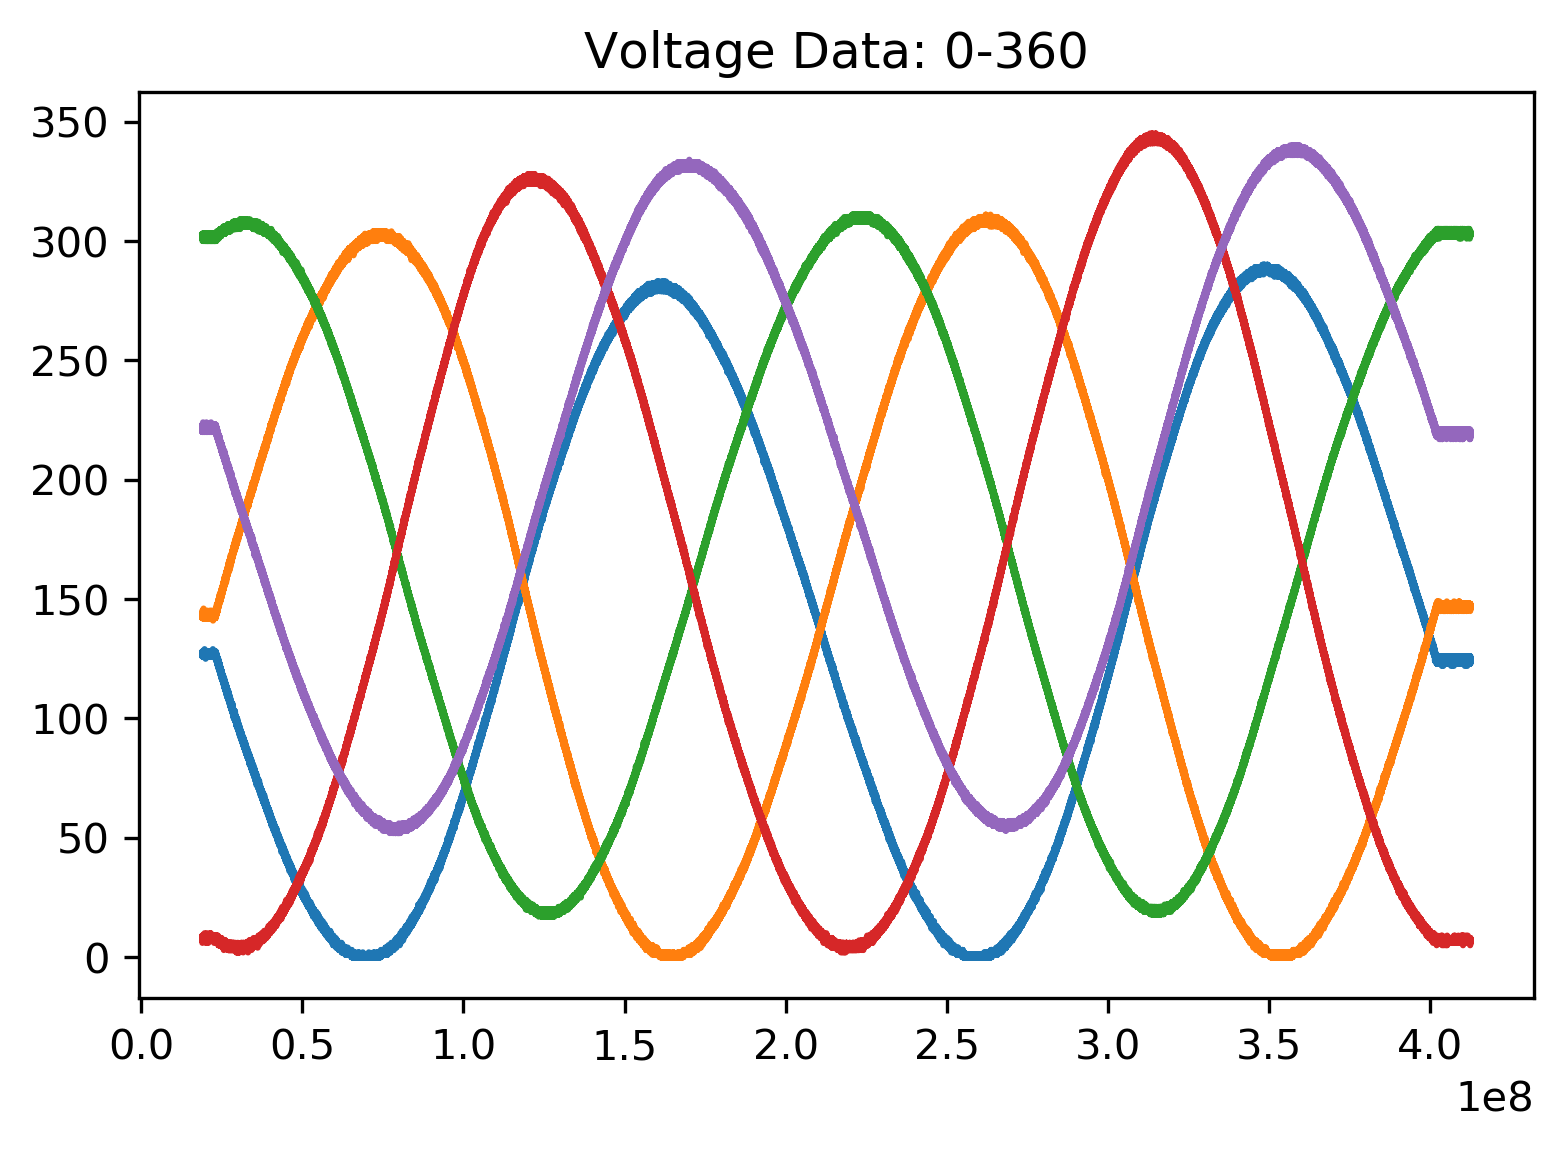

In [5]:
#Reads in the data from rotating the polarizer
df = pd.read_csv("1550_Calib_Lin_Pol8:5:17:40:57.csv")
#display(df)
dfArr = df.to_numpy()

timeArr = dfArr[:,0]
VArr = dfArr[:,1:]
plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(0,5):
    plt.plot(timeArr, VArr[:,i])


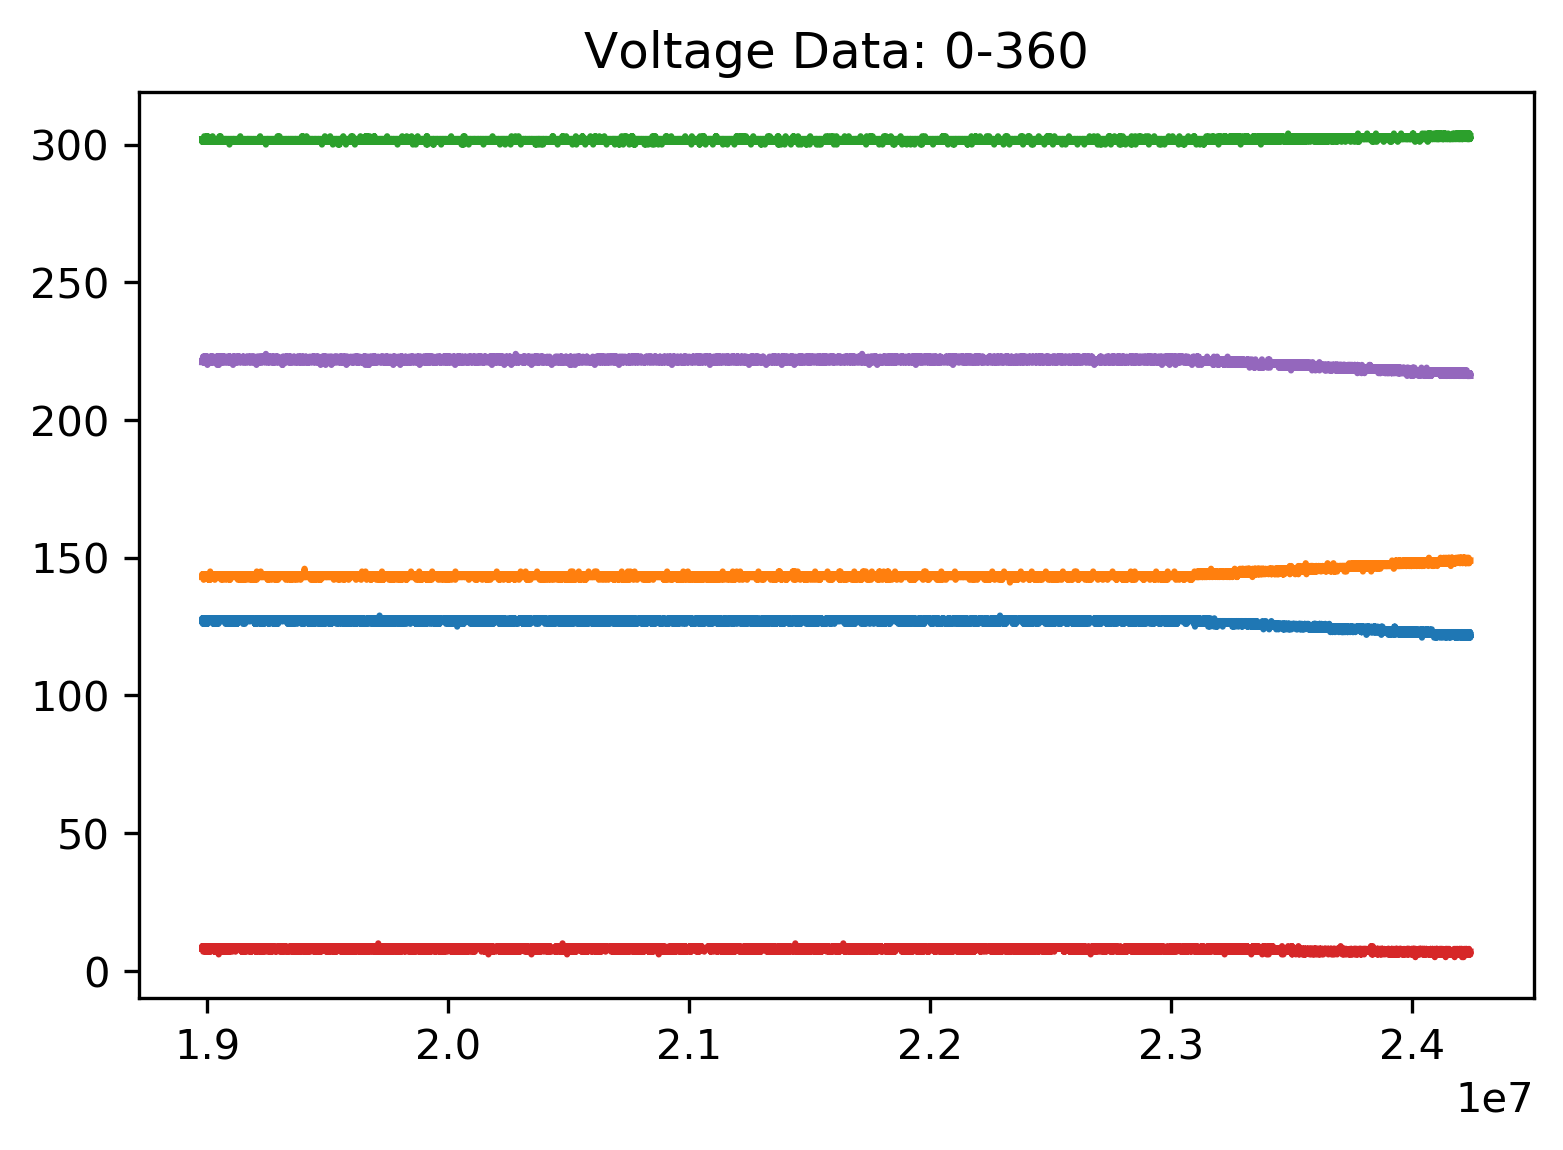

In [14]:
#Graphs small segment of data at the begining of the measurement run to estimate start of rotation
plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(0,5):
    plt.plot(timeArr[0:50000], VArr[0:50000,i])


In [20]:
print(np.where(timeArr < 2.32*10**7)[-1])
print(timeArr[np.where(timeArr < 2.32*10**7)][-1])

[    0     1     2 ... 40086 40087 40088]
23199914


From the graph above, I am going to tenatively define the time stamp 23199914 with index of 40088 as the start of the rotation. Later, I may want to come back and define this slight more precisely, but I don't think it will affect things too much. 

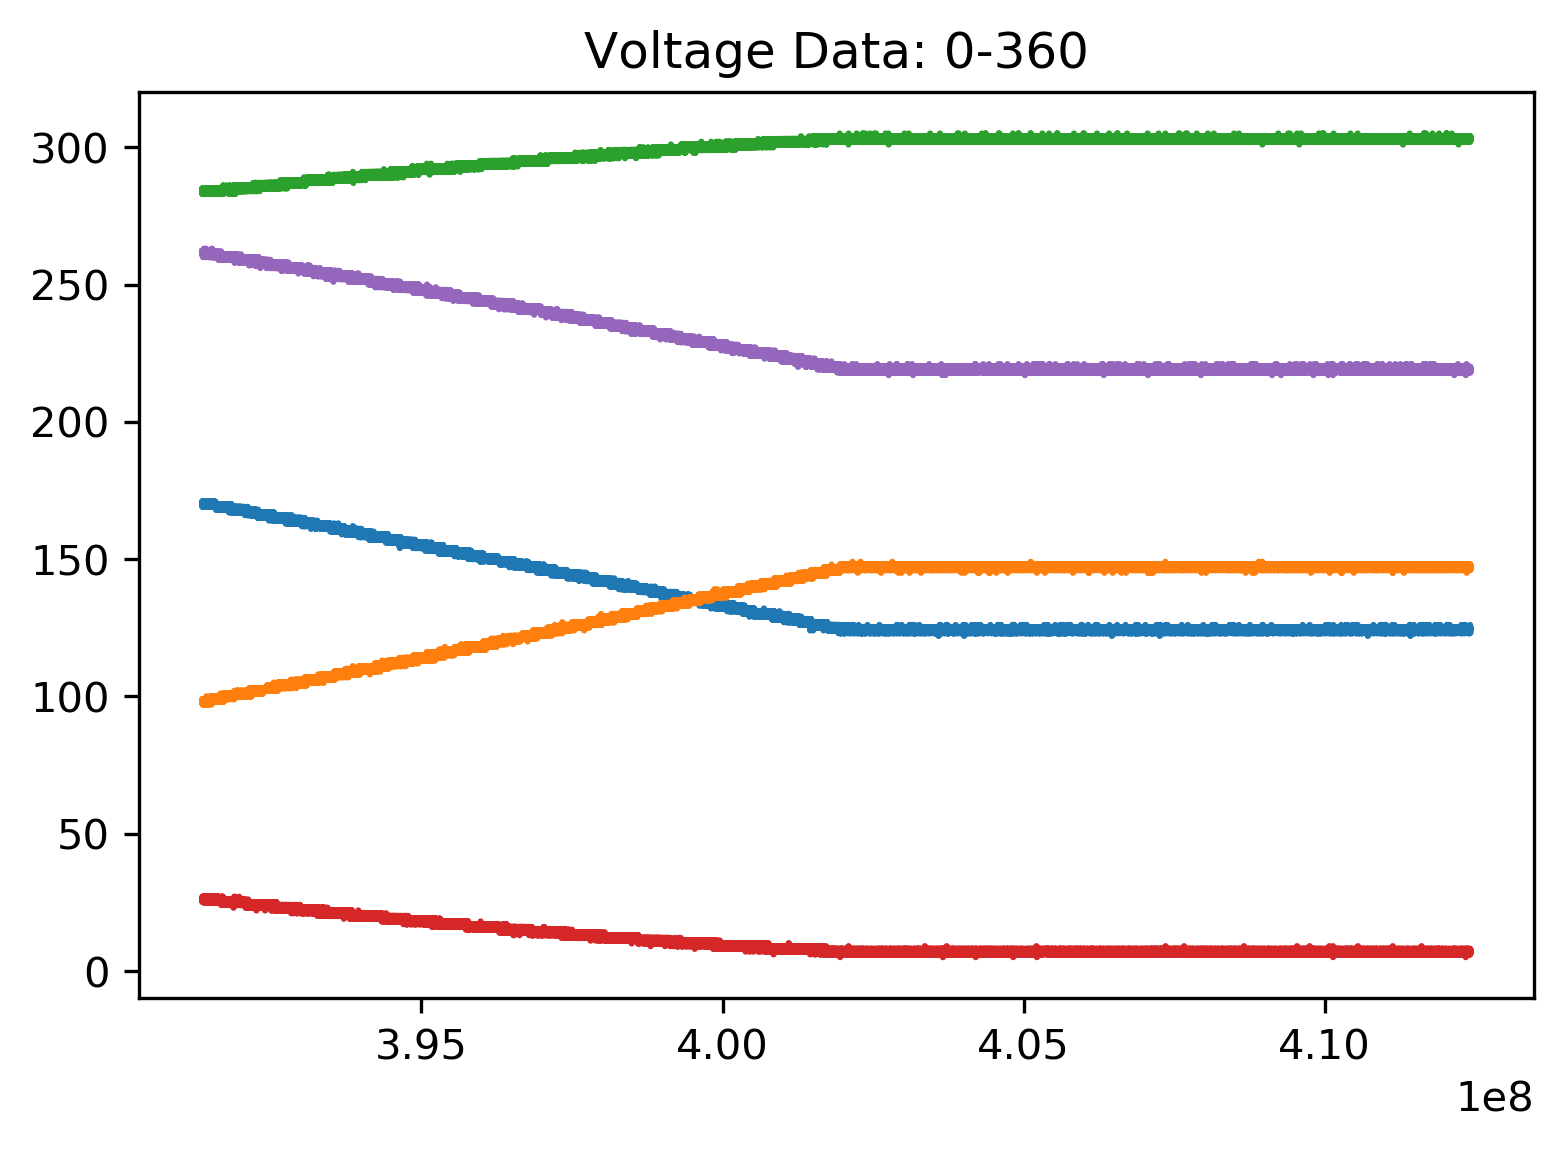

In [26]:
#Graph zoomed in on the end of the data to see where the polarizer stop rotated
plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(0,5):
    plt.plot(timeArr[-200000:-1], VArr[-200000:-1,i])

In [27]:
print(np.where(timeArr < 4.0025*10**8)[-1])
print(timeArr[np.where(timeArr < 4.0025*10**8)][-1])


[      0       1       2 ... 3620518 3620519 3620520]
400249898


Using the same method as above, zooming in on the graph and loosely picking where it the curve stops curving, I've decided on time stamp 400249898, element 3620520 as the end of the rotation.

In [6]:
#This graph maps the time stamps of the detector readings to polarizer angle
indexStart_Pol = 40088
indexStop_Pol = 3620520
tStart_Pol = 23199914
tEnd_Pol = 400249898
StartAngle = 0
StopAngle = 360.6824
RotationSpeed = (StopAngle-StartAngle)/(tEnd_Pol-tStart_Pol) #degrees/microsecond
print(RotationSpeed)
PolAngle = (timeArr[indexStart_Pol:indexStop_Pol] - tStart_Pol)*RotationSpeed + StartAngle #converts the time stamps in rotation angle
PolAngle = PolAngle - PolarizerVertical # converts angle of rotation mount into angle of polarizer axis
print(PolAngle)
VArrCrop = VArr[indexStart_Pol:indexStop_Pol]


9.565904132222425e-07
[ 44.18        44.18010044  44.18020184 ... 404.86209772 404.86219816
 404.86229956]


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


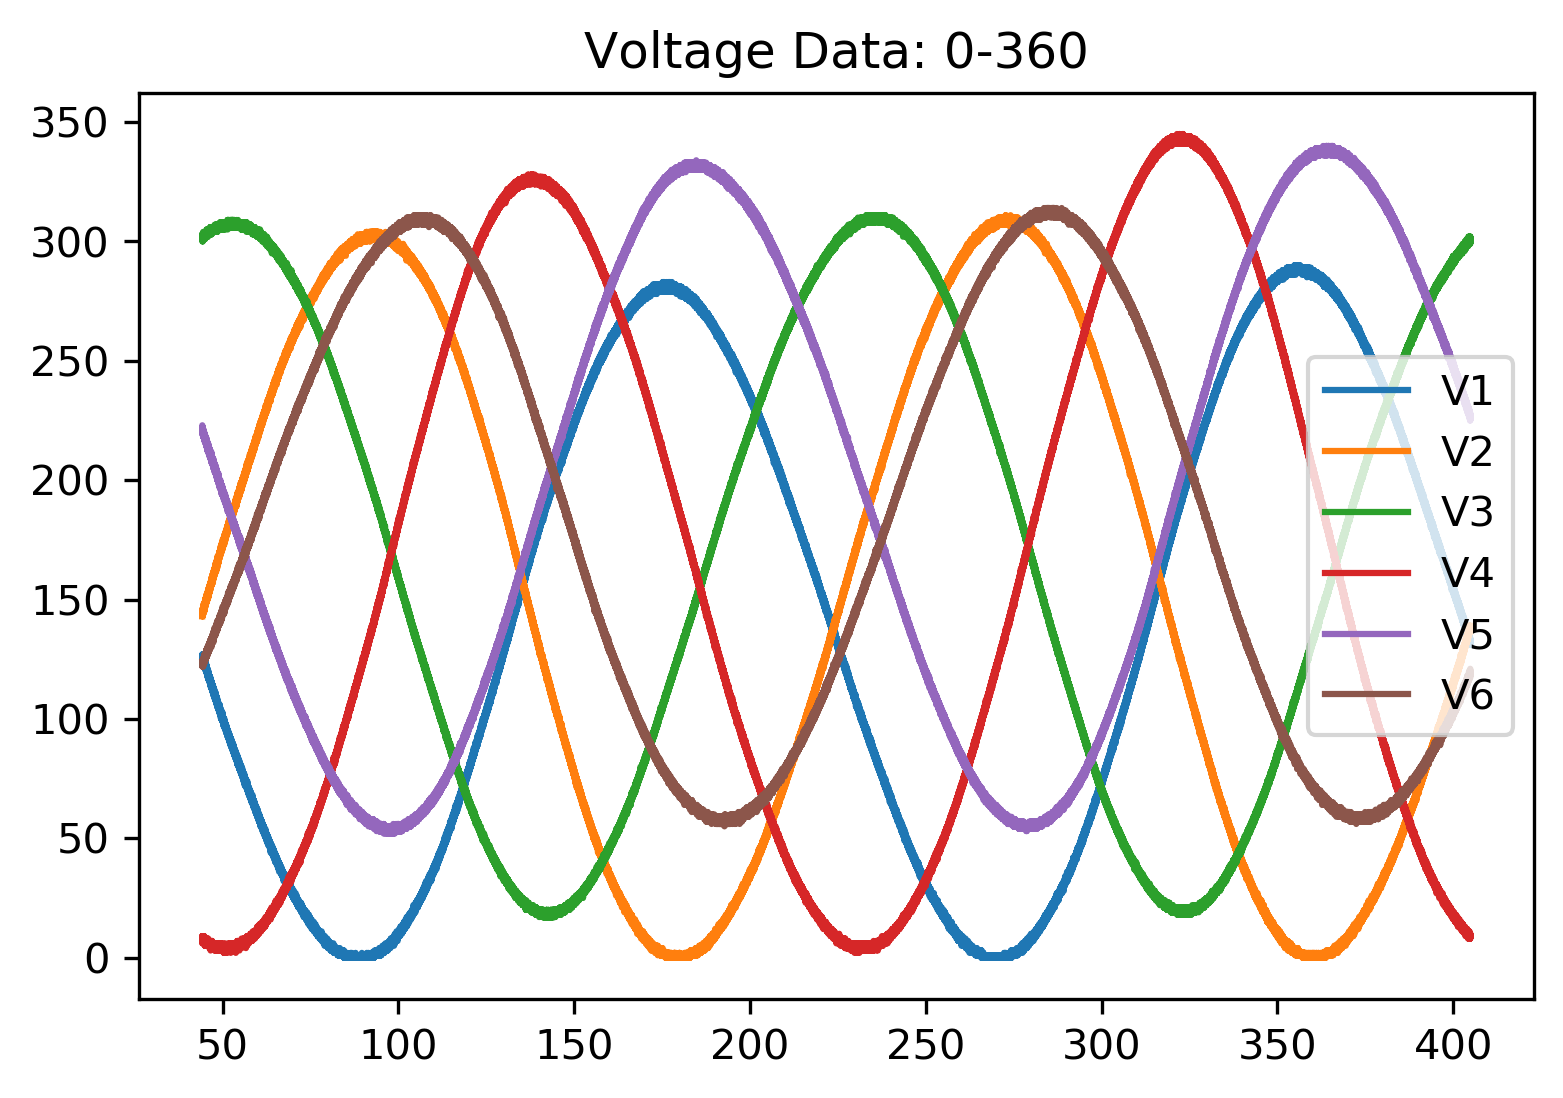

In [29]:
#This is the detector data graphed as function of the polarizer angle
plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(0,6):
    plt.plot(PolAngle, VArrCrop[:,i], label = "V{}".format(i+1))
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


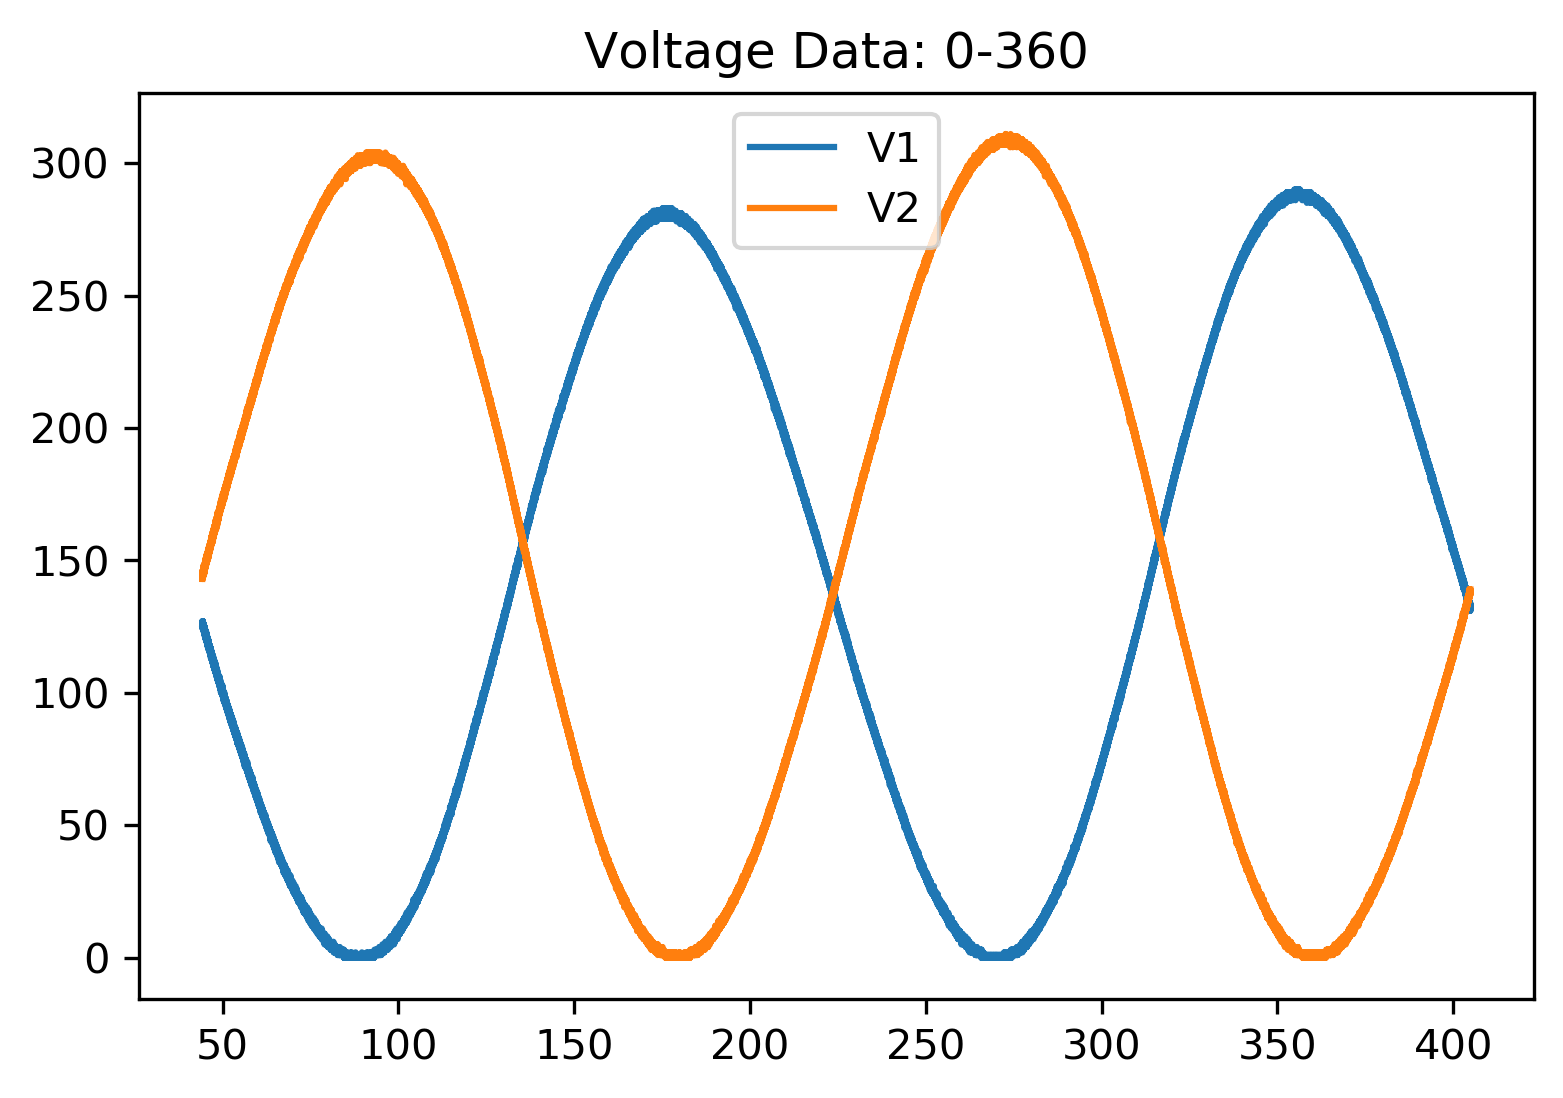

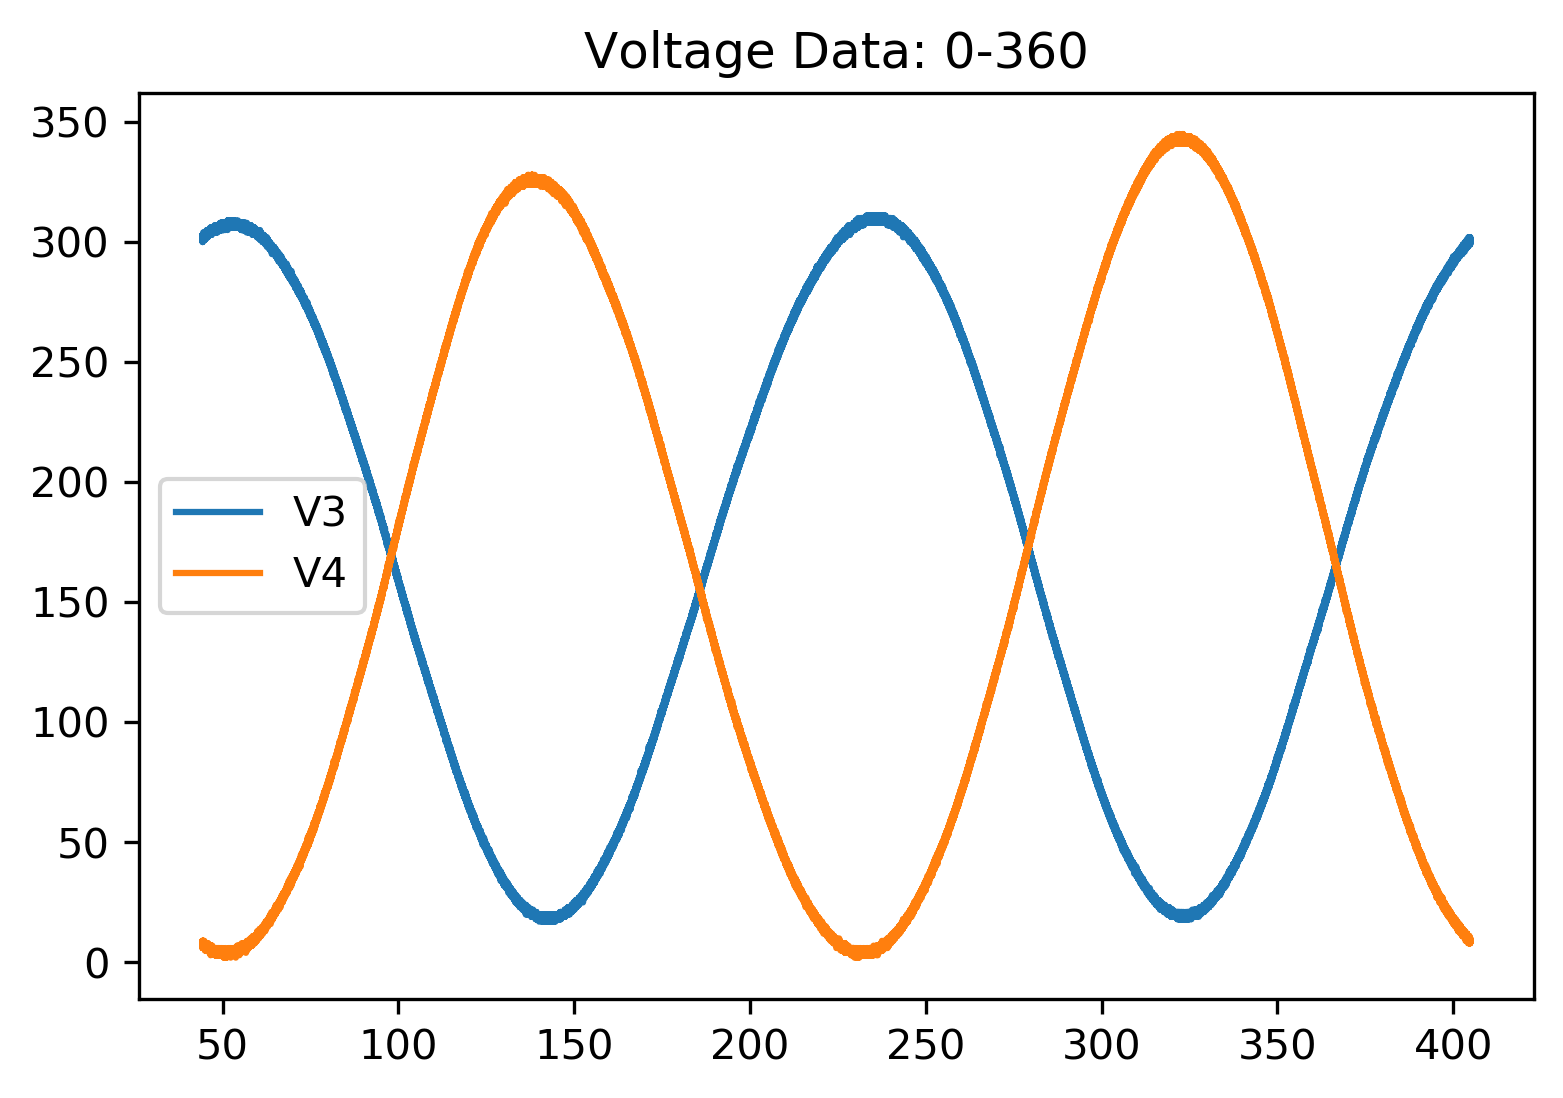

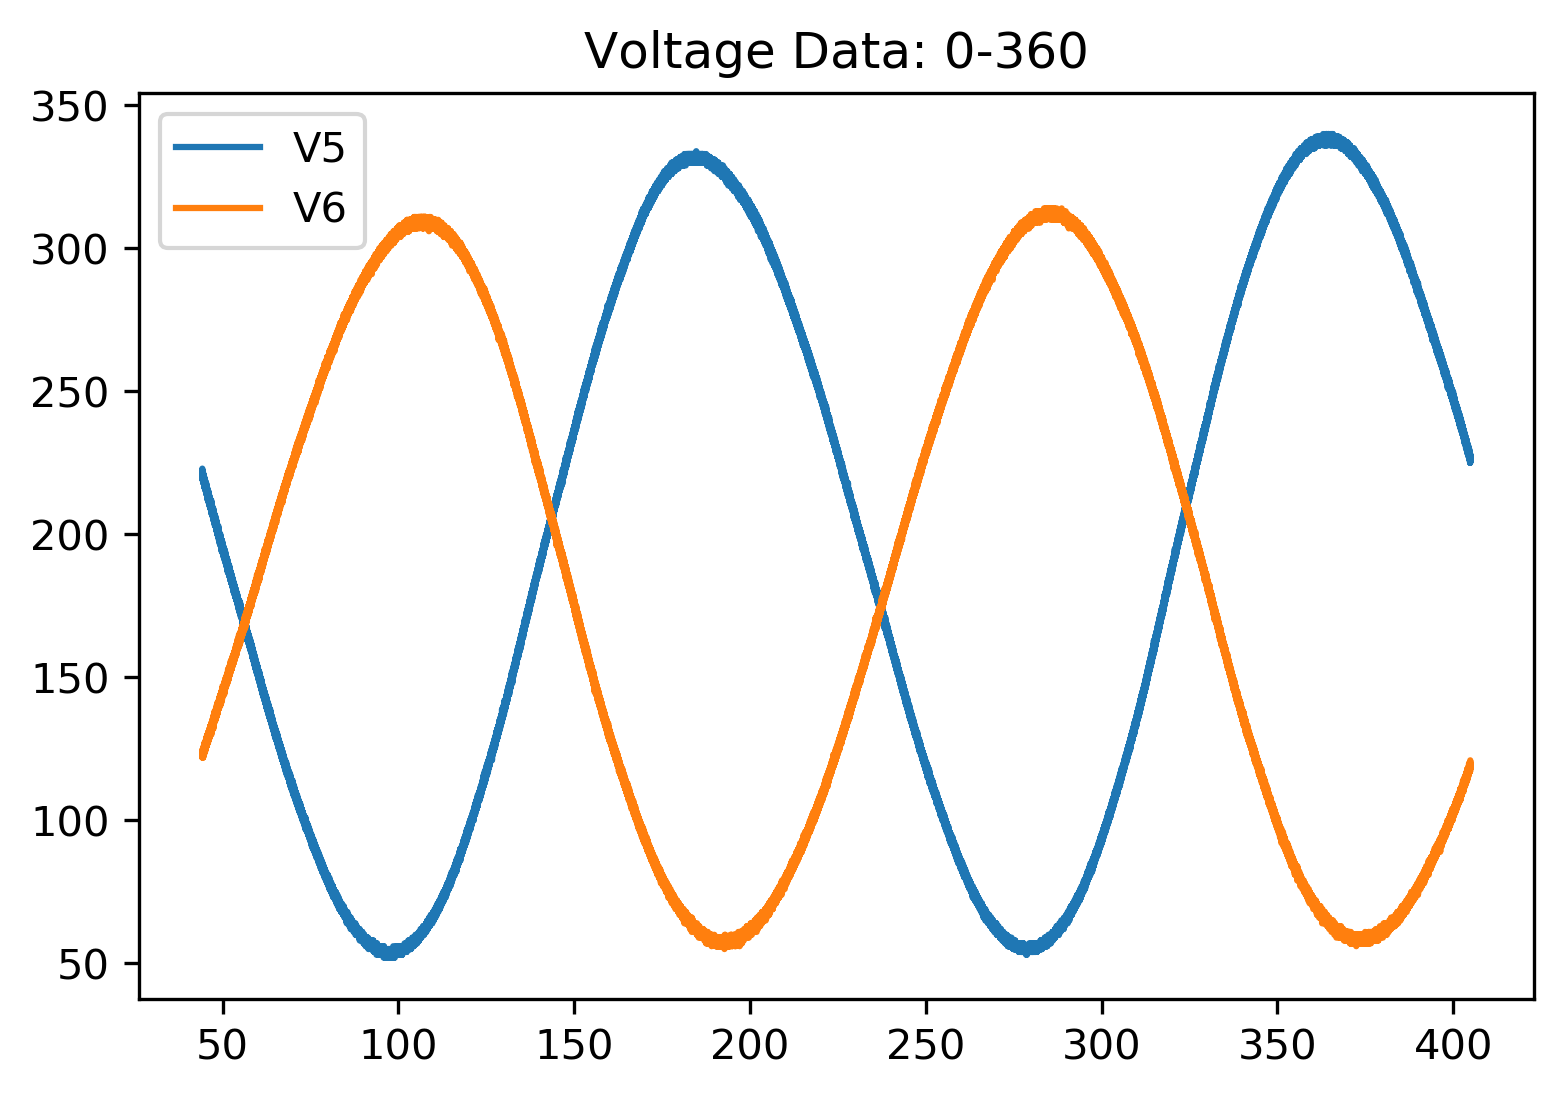

In [30]:
plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(0,2):
    plt.plot(PolAngle, VArrCrop[:,i], label = "V{}".format(i+1))
plt.legend()

plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(2,4):
    plt.plot(PolAngle, VArrCrop[:,i], label = "V{}".format(i+1))
plt.legend()

plt.figure(dpi=300)
plt.title("Voltage Data: 0-360")
for i in range(4,6):
    plt.plot(PolAngle, VArrCrop[:,i], label = "V{}".format(i+1))
plt.legend()

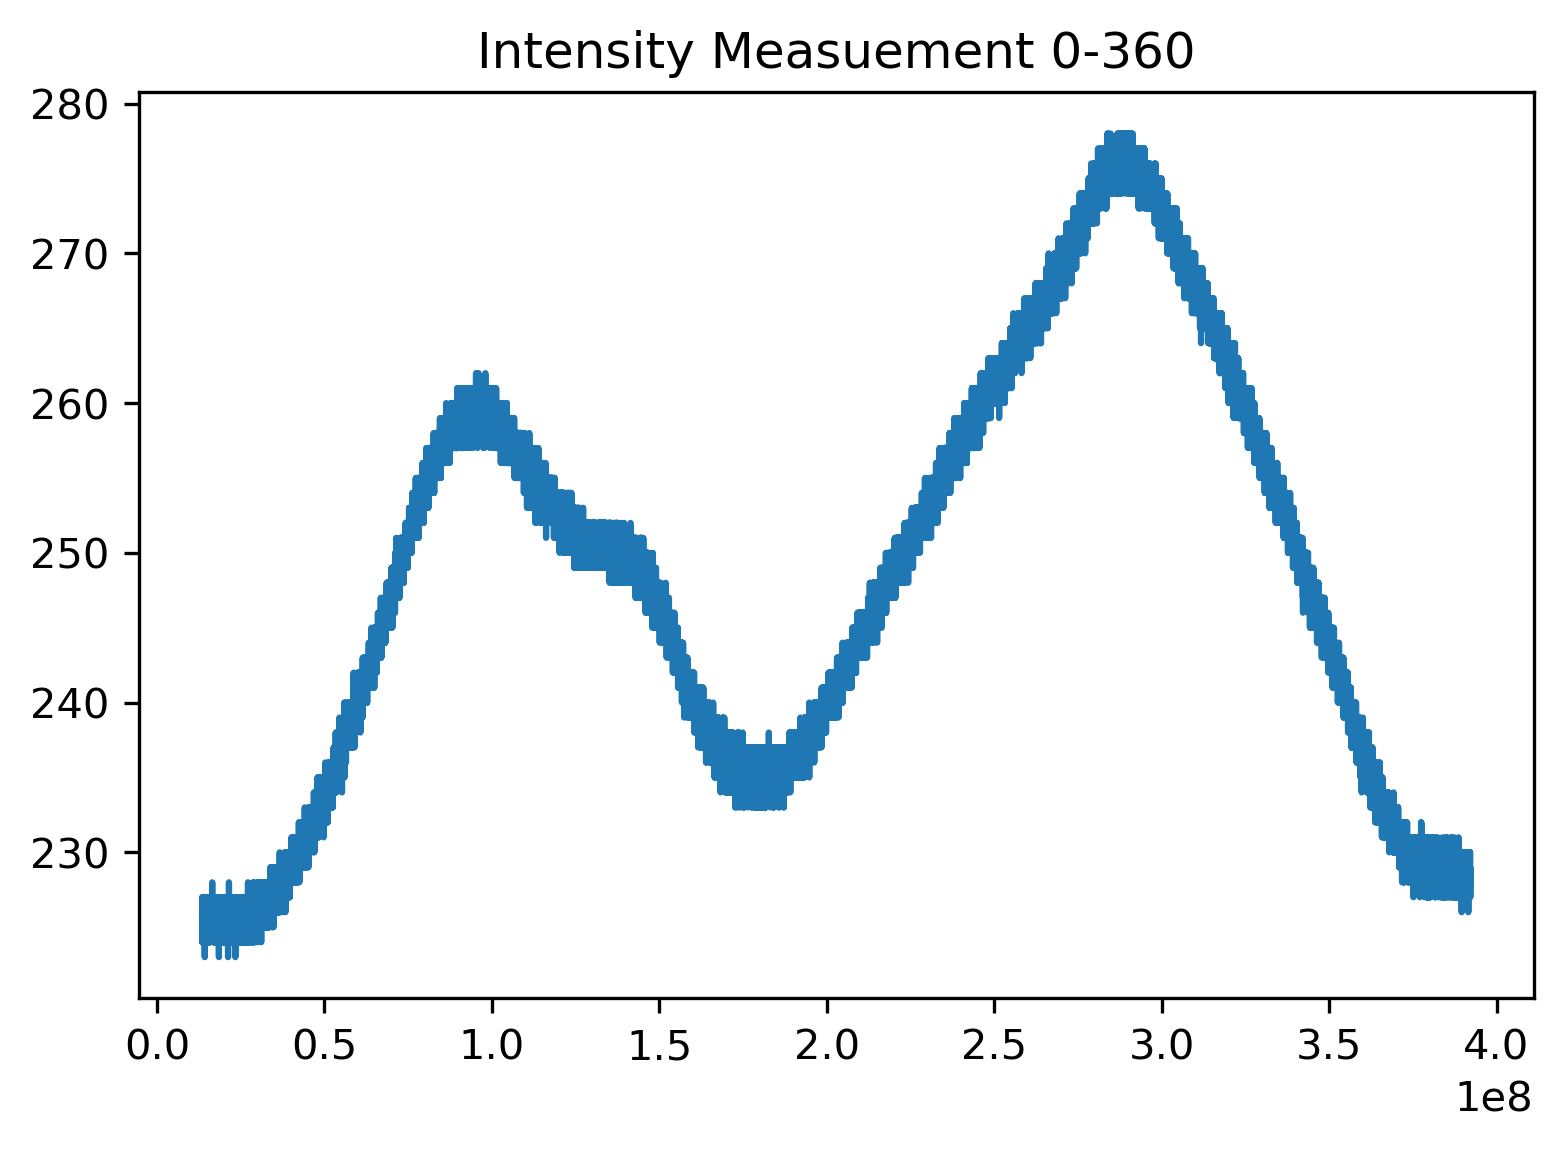

In [7]:
dfI = pd.read_csv("1550_Calib_Lin_Int8:5:17:31:37.csv")
#display(dfI)
dfIArr = dfI.to_numpy()
ITimeArr = dfIArr[:,0]
IArr = dfIArr[:,1]
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(ITimeArr,IArr)

[     0      1      2 ... 156990 156991 156992]
29999994


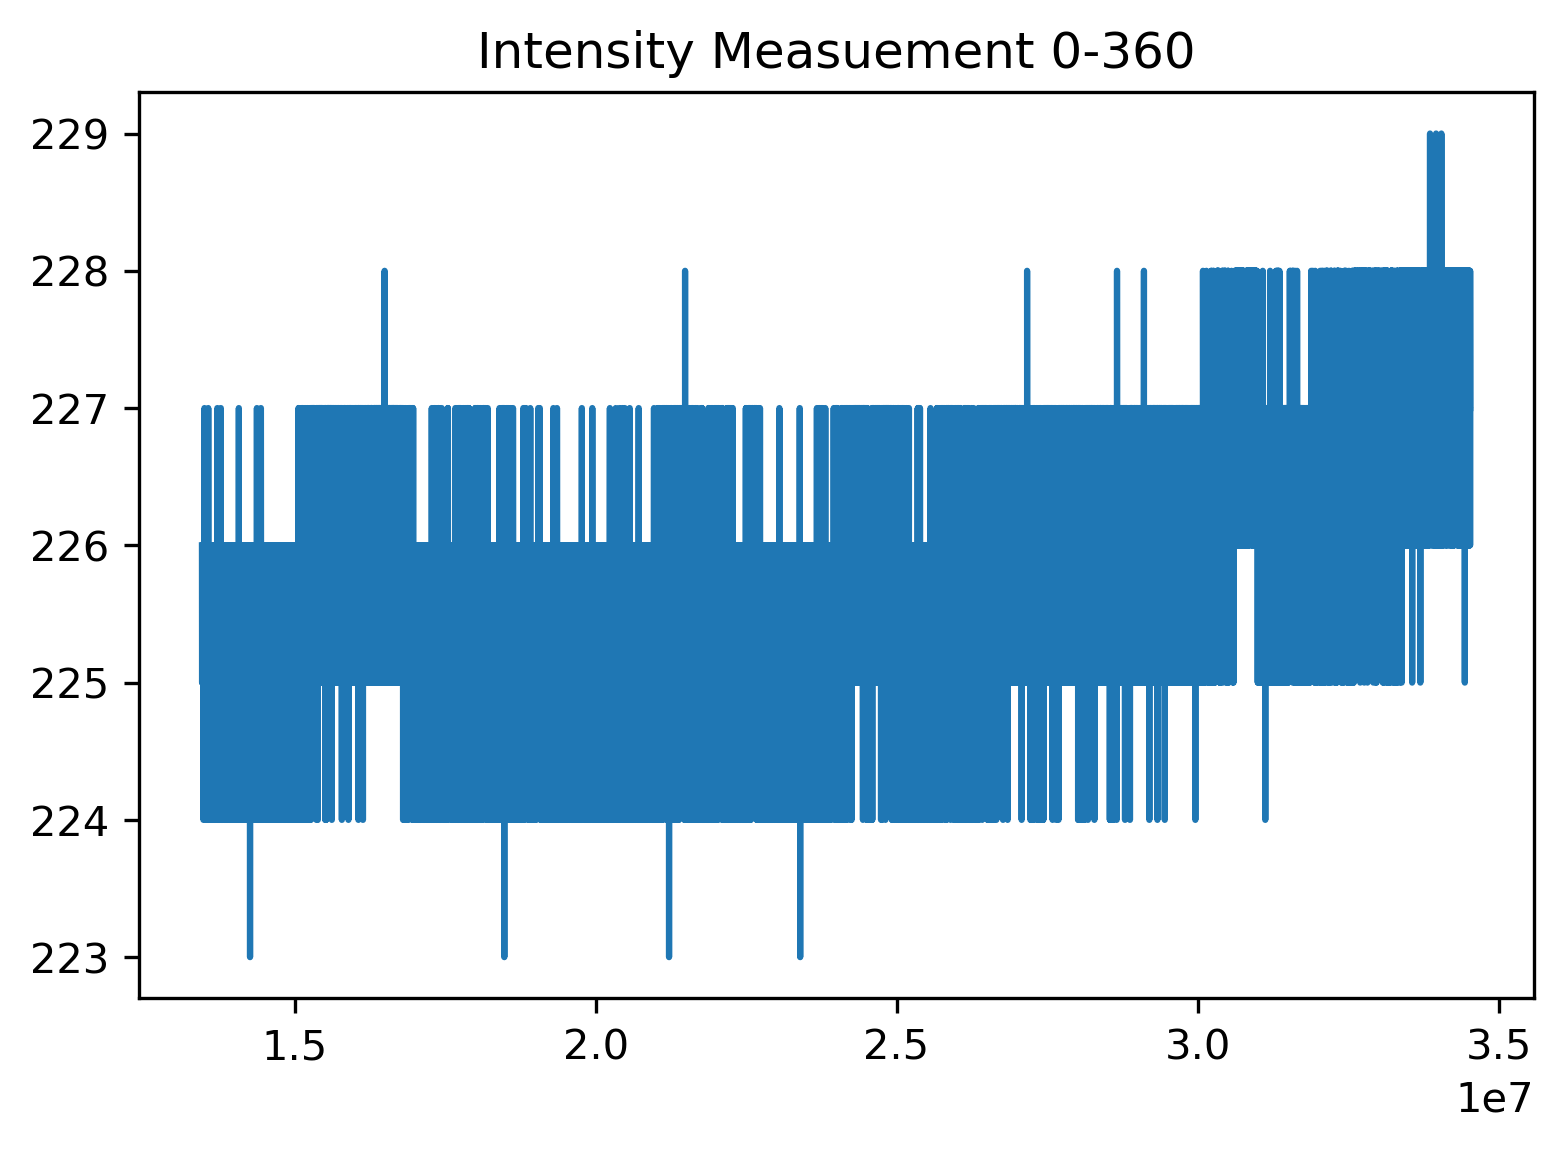

In [40]:
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(ITimeArr[0:200000],IArr[0:200000])
print(np.where(ITimeArr < 3*10**7)[-1])
print(ITimeArr[np.where(ITimeArr < 3*10**7)][-1])

[      0       1       2 ... 3432630 3432631 3432632]
374999950


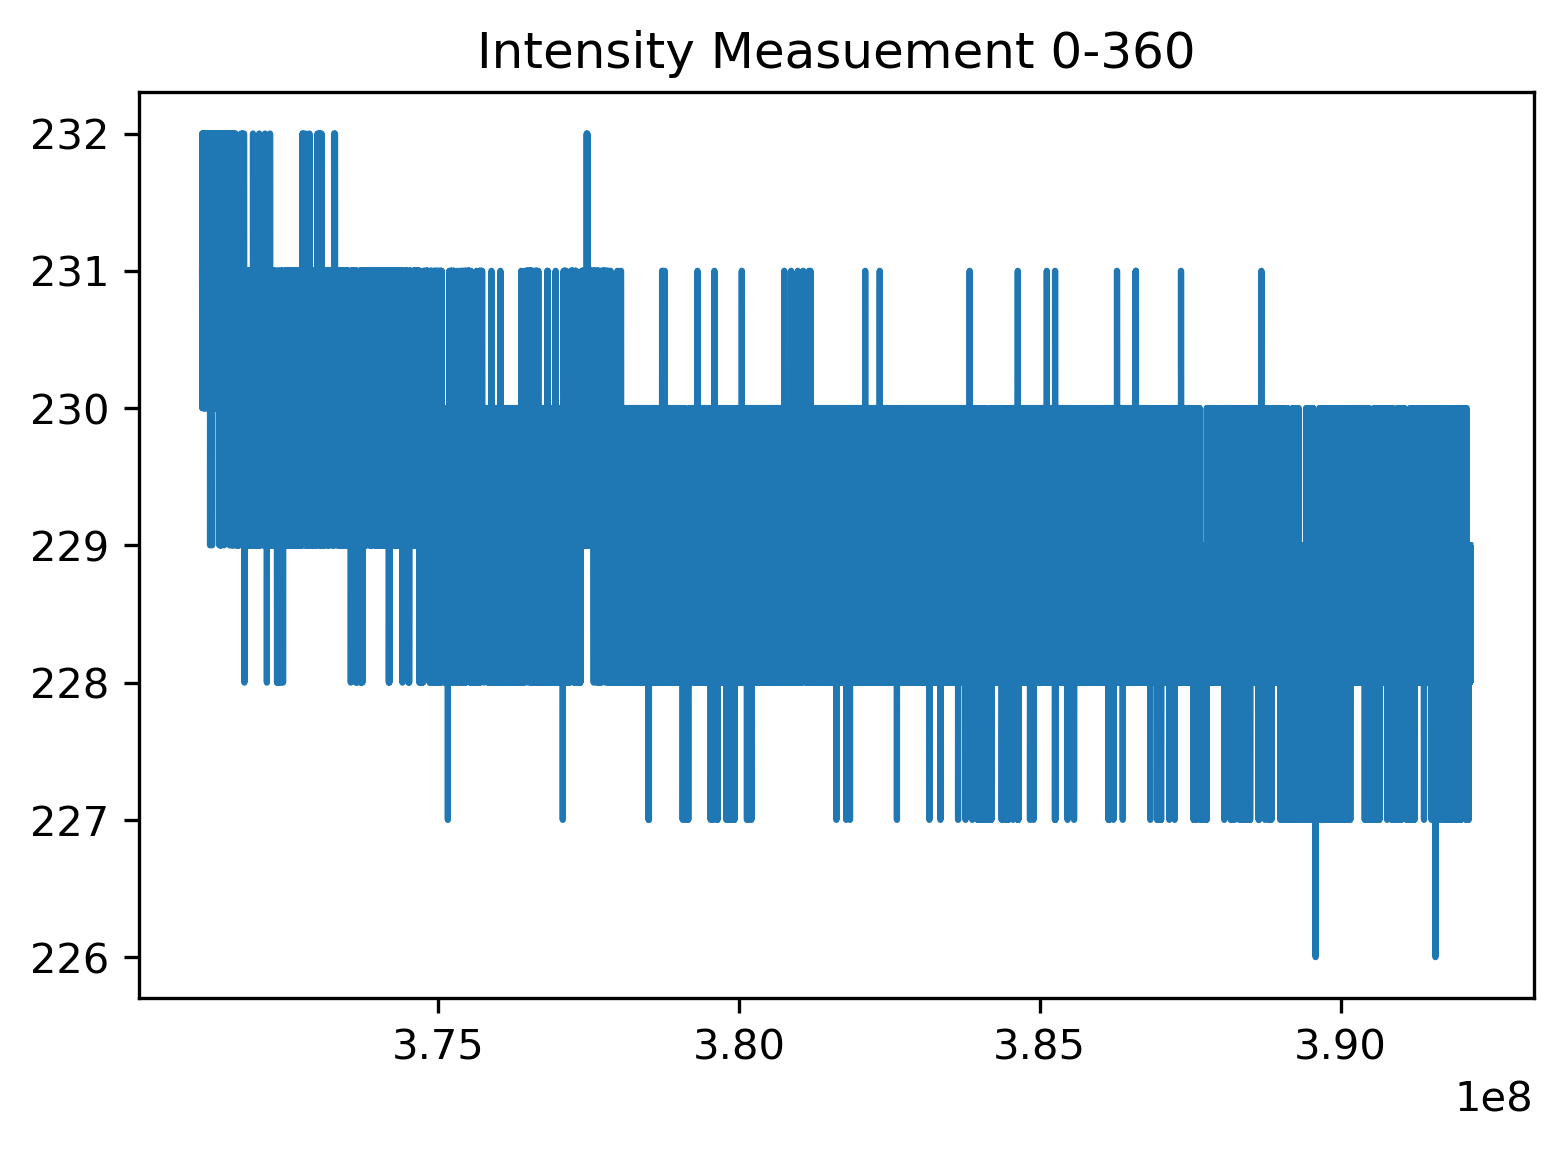

In [44]:
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(ITimeArr[-200000:-1],IArr[-200000:-1])
print(np.where(ITimeArr < 3.75*10**8)[-1])
print(ITimeArr[np.where(ITimeArr < 3.75*10**)][-1])

Just looking at the overall intensity measurement plot, it seems like there is not much to trim off on either end. Out of laziness and lack or a much better idea, I am going to leave all the data in the array and map the time stamps to angle measurements.

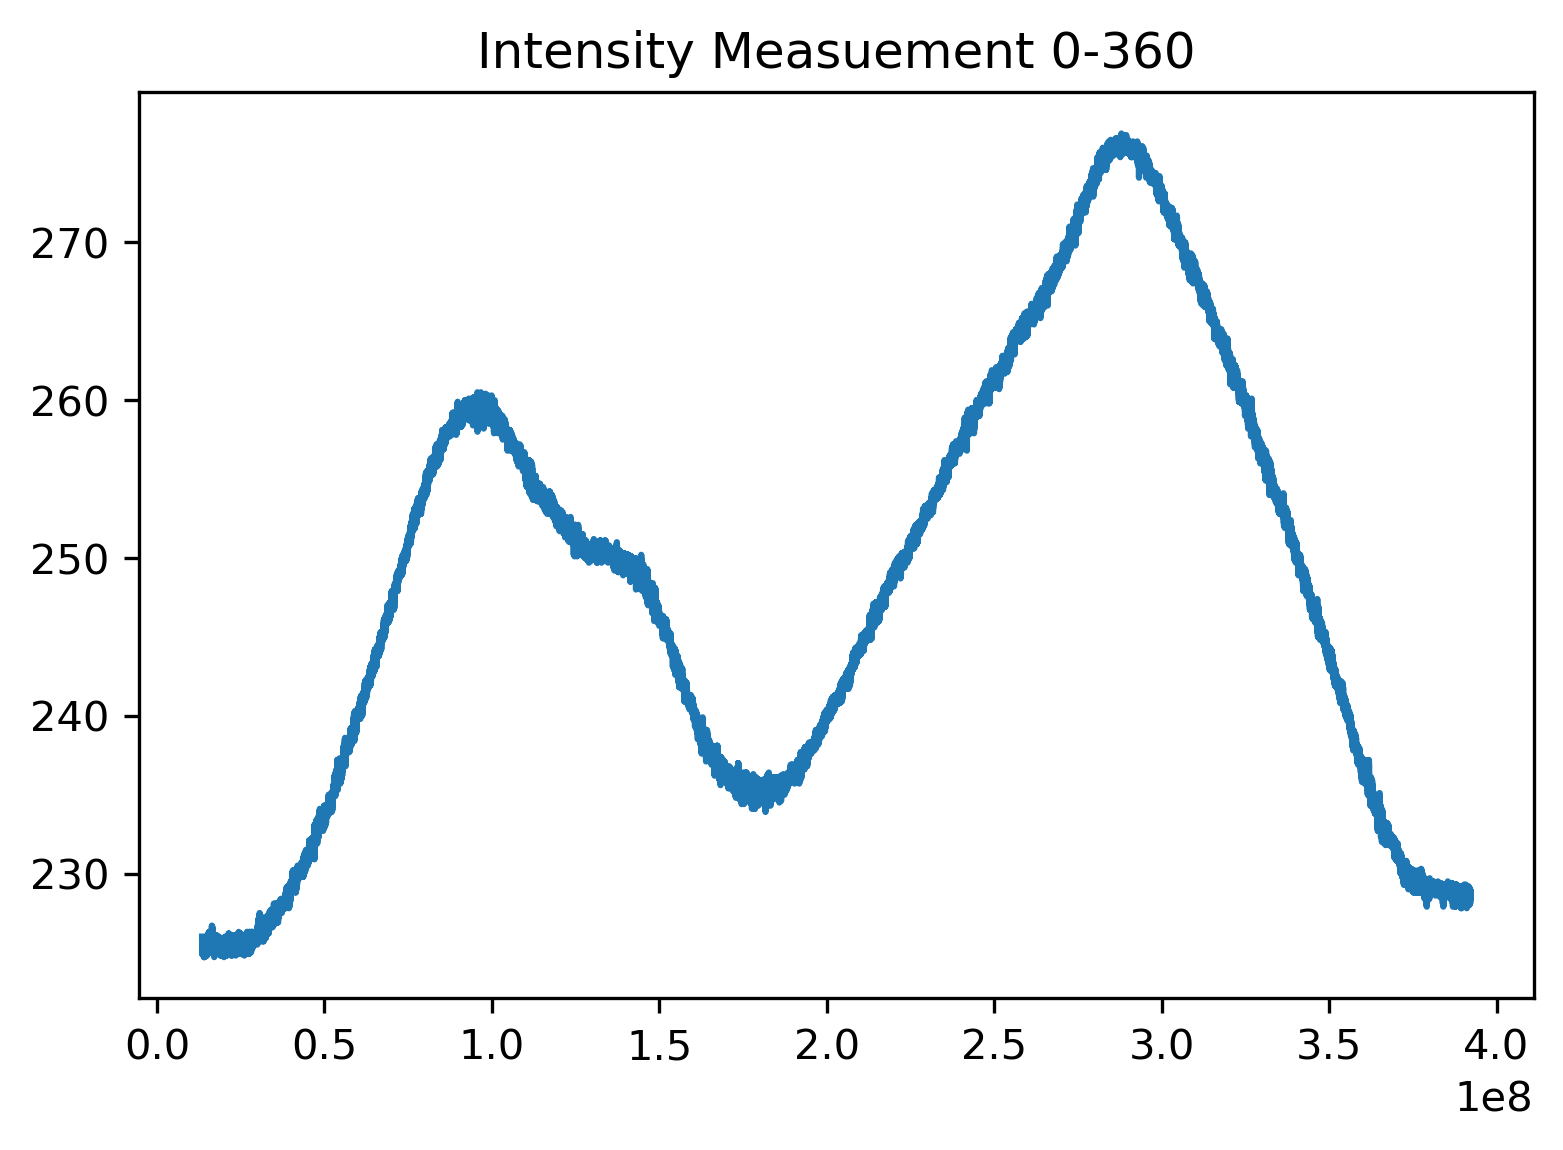

In [8]:
#This code experiments with taking a rolling average of the intensity data to smooth out some noise
dfIavg = dfI.rolling(10,1).mean()
#display(dfIavg)
dfIArravg = dfIavg.to_numpy()
ITimeArravg = dfIArravg[:,0]
IArravg = dfIArravg[:,1]
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(ITimeArravg,IArravg)

1.0456812927825417e-06
[ 44.17950435  44.17961446  44.17972457 ... 404.9391736  404.93928371
 404.93939382]


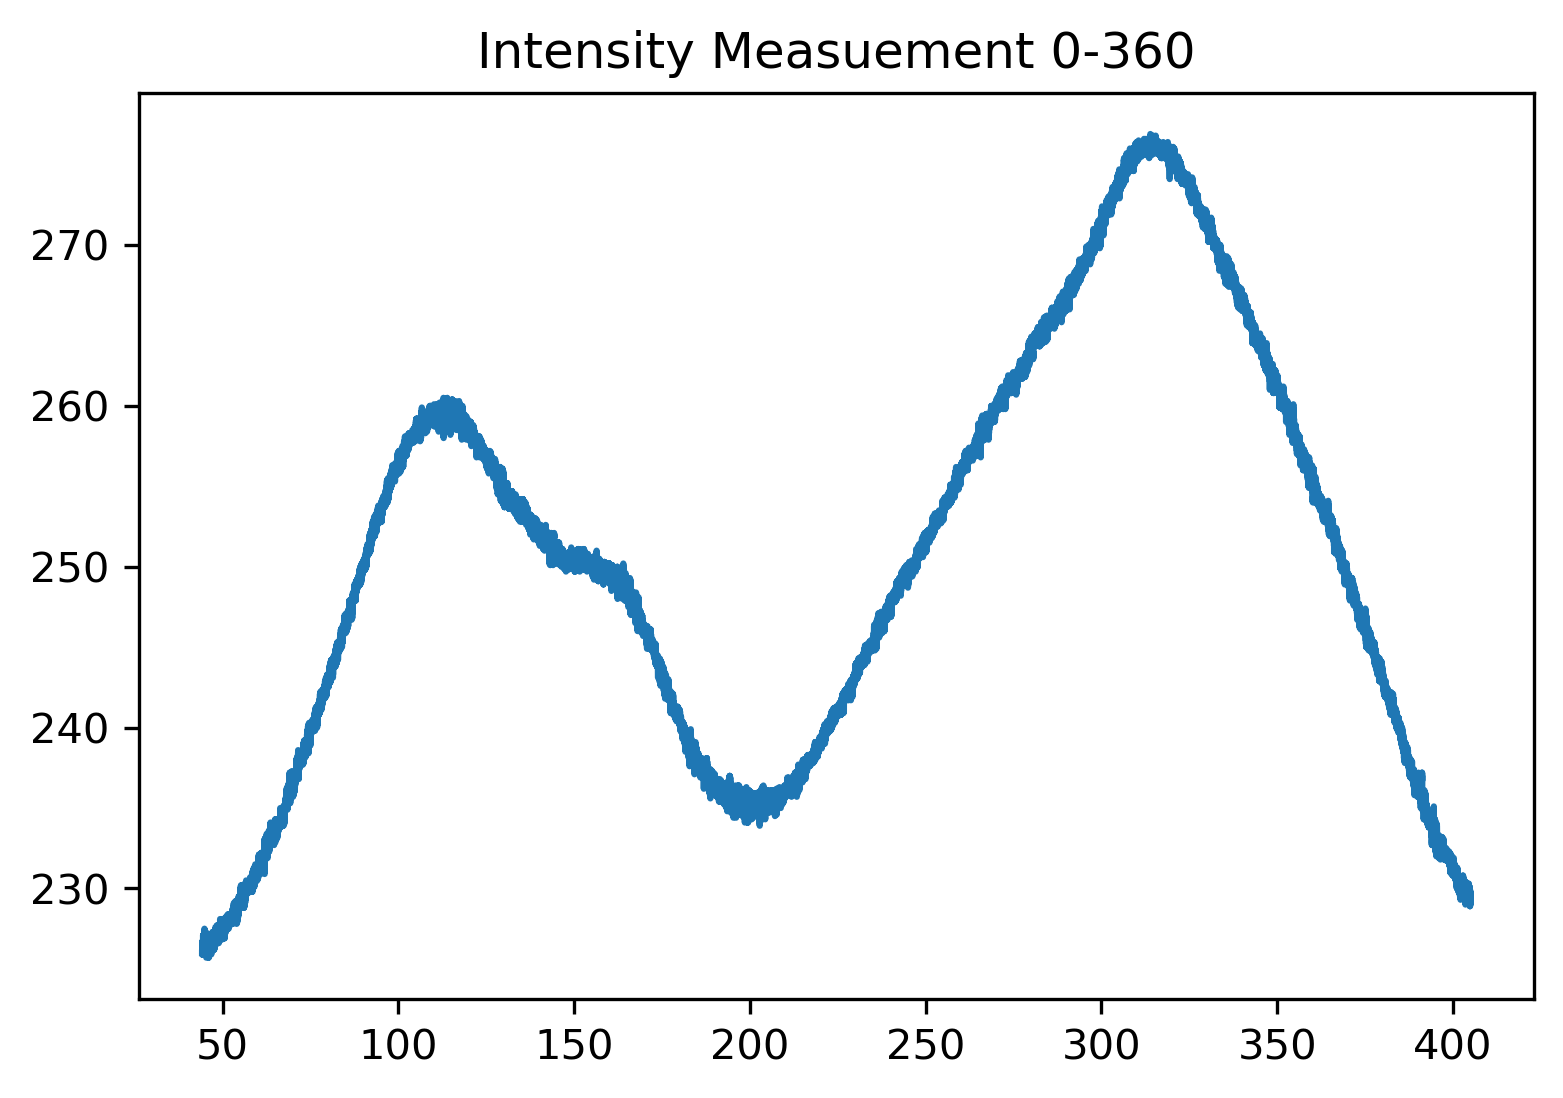

In [9]:
#This cell establishes the relationship between timestamp and polarizer angle and graphs the data for the rolling average
#intensity data
indexStart_Pol = 156992
indexStop_Pol = 3432632
tStart_Pol = 29999994
tEnd_Pol = 374999950
StartAngle = 0
StopAngle = 360.76
RotationSpeed = (StopAngle-StartAngle)/(tEnd_Pol-tStart_Pol) #degrees/microsecond
print(RotationSpeed)
IAngleavg = (ITimeArravg[indexStart_Pol:indexStop_Pol] - tStart_Pol)*RotationSpeed + StartAngle #converts the time stamps in rotation angle
IAngleavg = IAngleavg - PolarizerVertical # converts angle of rotation mount into angle of polarizer axis
print(IAngleavg)
IArrCropavg = IArravg[indexStart_Pol:indexStop_Pol]
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(IAngleavg,IArrCropavg)

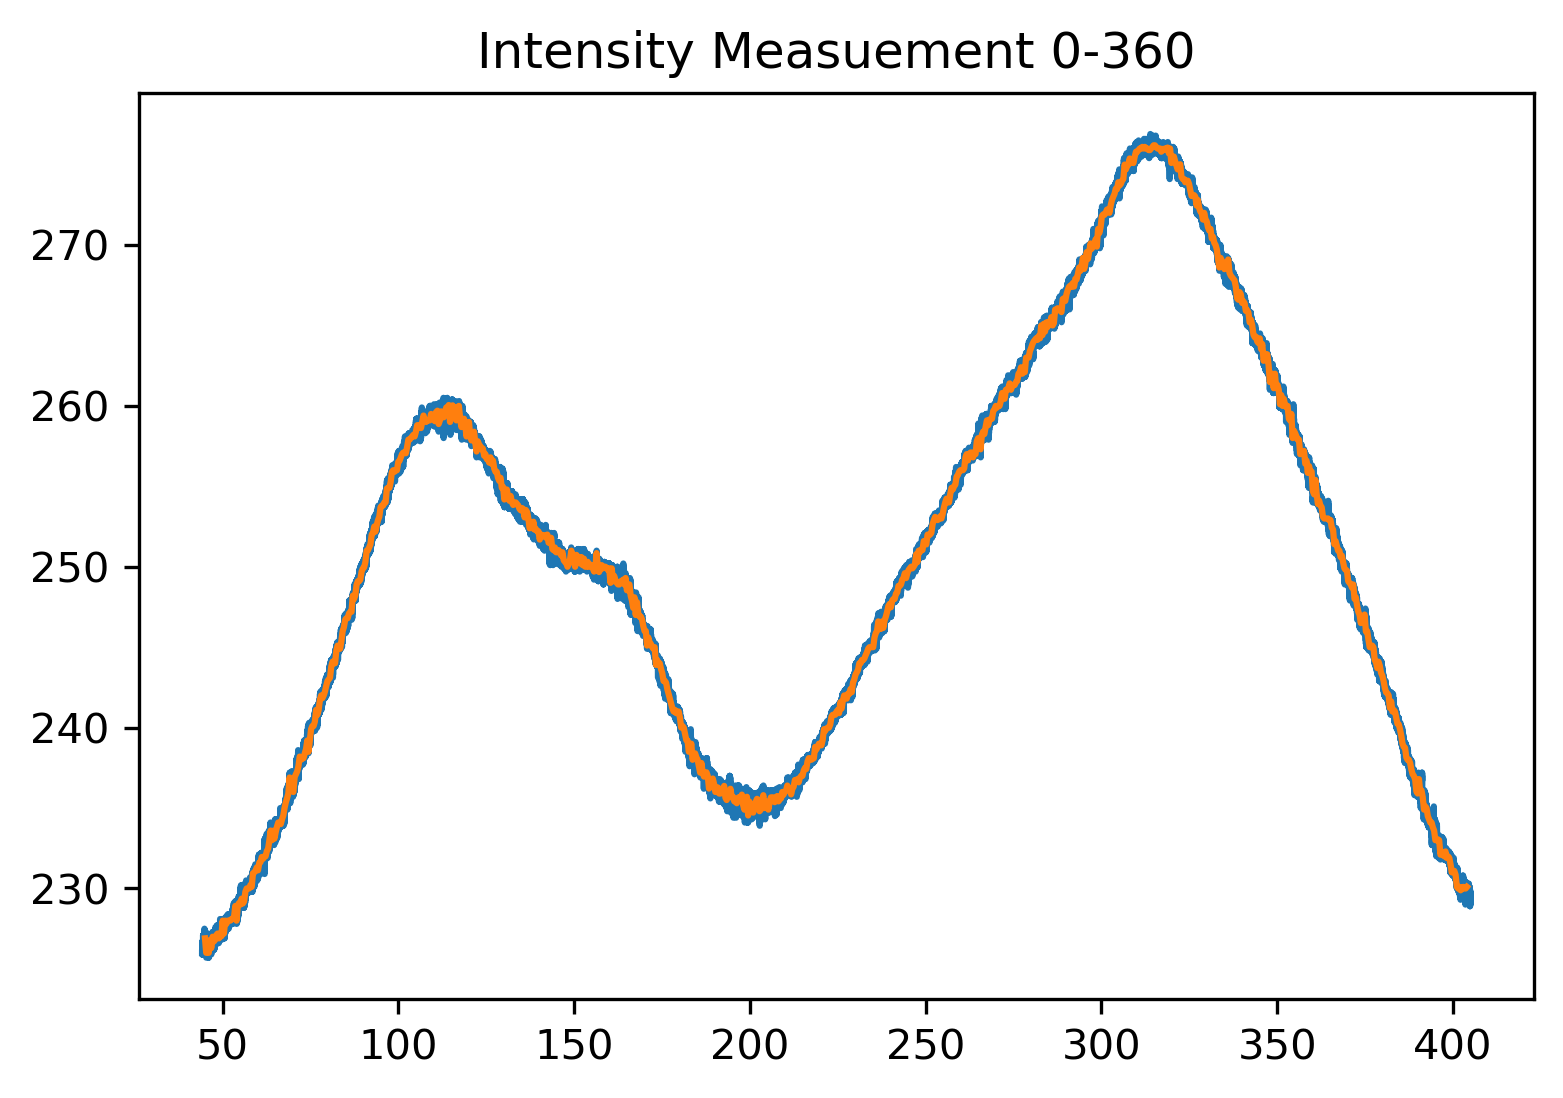

In [10]:
#This cell calculates an interpolation of the intensity data to be used for fitting. 
Iinterp = interpolate.interp1d(IAngleavg, IArrCropavg)
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(IAngleavg,IArrCropavg)
x= np.linspace(45,404,1000)
plt.plot(x, Iinterp(x))

In [172]:
#In this cell I determined the valid range of the interpolation by experimenting with values.
Iinterp(404.93)
#These ranges are below and above the valid range.
#-infinity to 44.18
#404.93 to infinity

array(274.36015476)

In [173]:
# print(ITimeArr[0])
print(ITimeArr[-1])

401460676


In [11]:
#This cell maps the time stamps to polarizer angle for the non averaged intensity data.
indexStart_Pol = 0
indexStop_Pol = -1
tStart_Pol = 25024104
tEnd_Pol = 401460676
StartAngle = 0
StopAngle = 360.76
RotationSpeed = (StopAngle-StartAngle)/(tEnd_Pol-tStart_Pol) #degrees/microsecond
print(RotationSpeed)
IAngle = (ITimeArr[indexStart_Pol:indexStop_Pol] - tStart_Pol)*RotationSpeed + StartAngle #converts the time stamps in rotation angle
IAngle = IAngle - PolarizerVertical # converts angle of rotation mount into angle of polarizer axis
print(IAngle)
IArrCrop = IArr[indexStart_Pol:indexStop_Pol]


9.583553427959704e-07
[ 33.09853717  33.0986378   33.09873938 ... 396.0186174  396.01871803
 396.01881866]


This method doesn't deserve any praise, but the "measured" rotation speeds that come out of this method are 9.511874505399017e-07 and 9.583553427959704e-07 for the polarization and intensity measurements respectively which is nice and consistent. These are in degrees\us so and we are expecting the rotation rate to be 1deg/s so consistent.

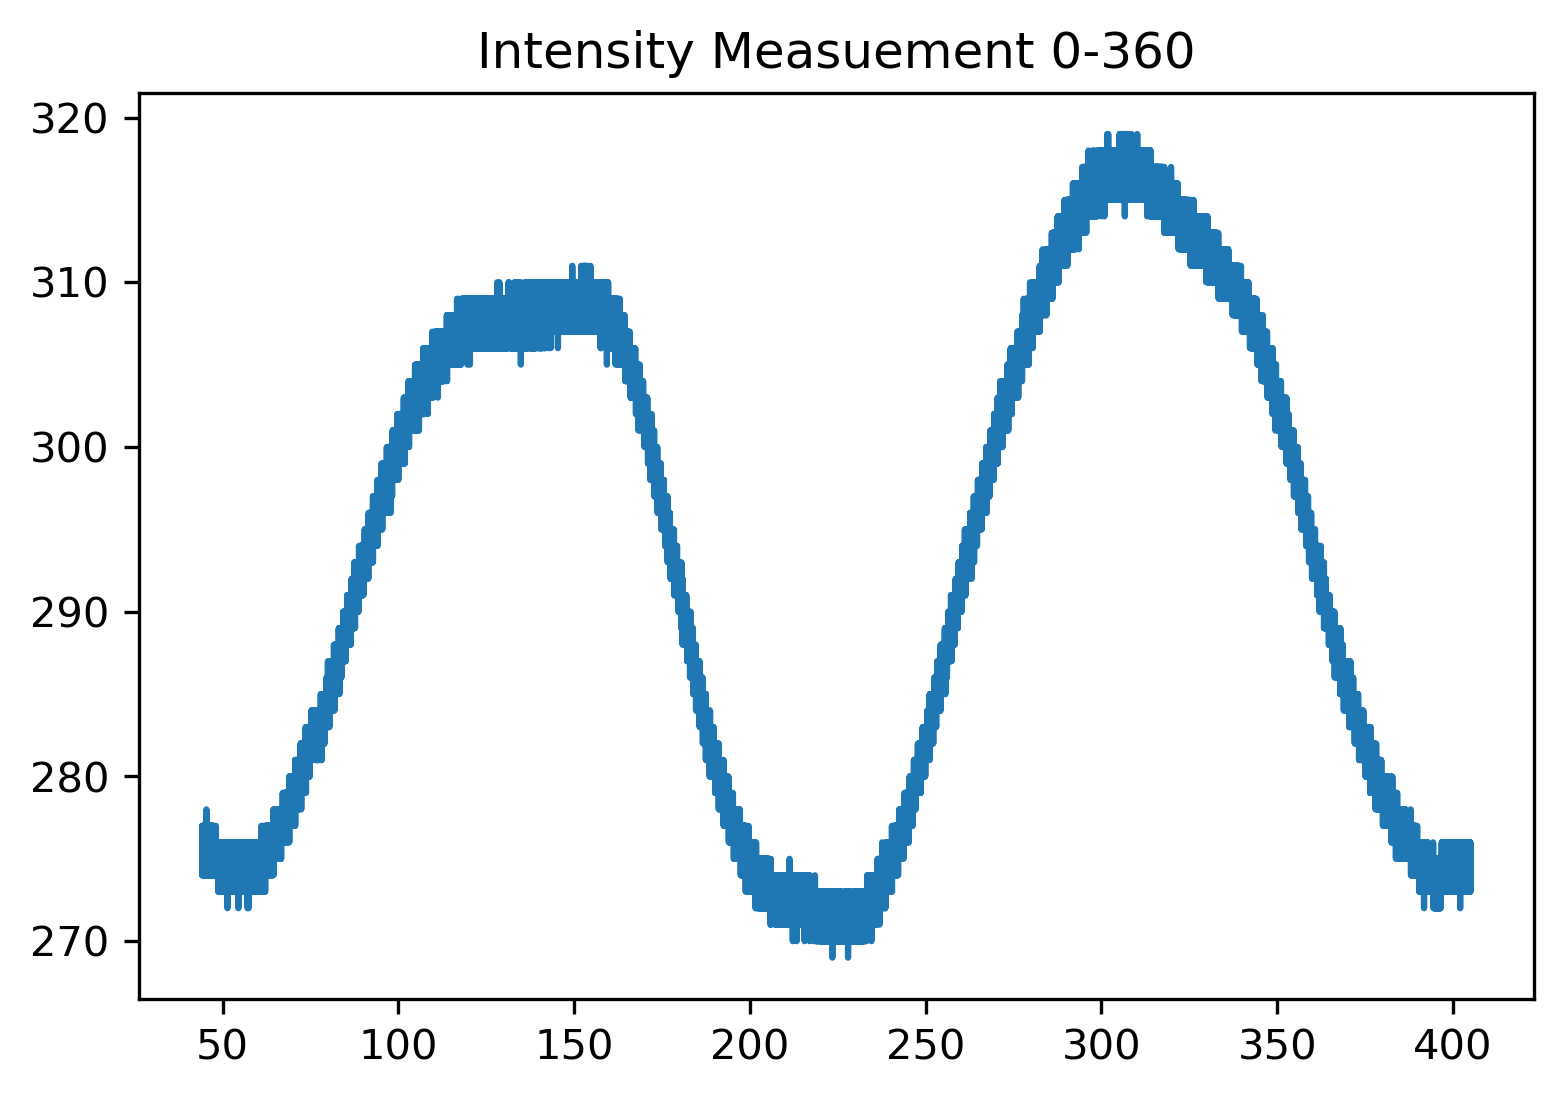

In [58]:
plt.figure(dpi=300)
plt.title("Intensity Measuement 0-360")
plt.plot(IAngle,IArrCrop)

In [12]:
def calcStokes(vState):
    if np.shape(vState) != (6,):
        pStateArr = []
        for curState in vState:
            curpState = calcStokes(curState)
            pStateArr.append(curpState)
        pStateResult = pStateArr
    else:
        V1, V2, V3, V4, V5, V6 = vState
        S1 = V2 - V1
        S2 = V3 - V4
        S3 = V6 - V5
        S0 = (V1 + V2 + V3 + V4 + V5 + V6)/3
        DOP = (S1**2 + S2**2 + S3**2)**0.5/S0
        S1 = S1/S0
        S2 = S2/S0
        S3 = S3/S0
        pStateResult =DOP,  1, S1, S2, S3
    return pStateResult

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


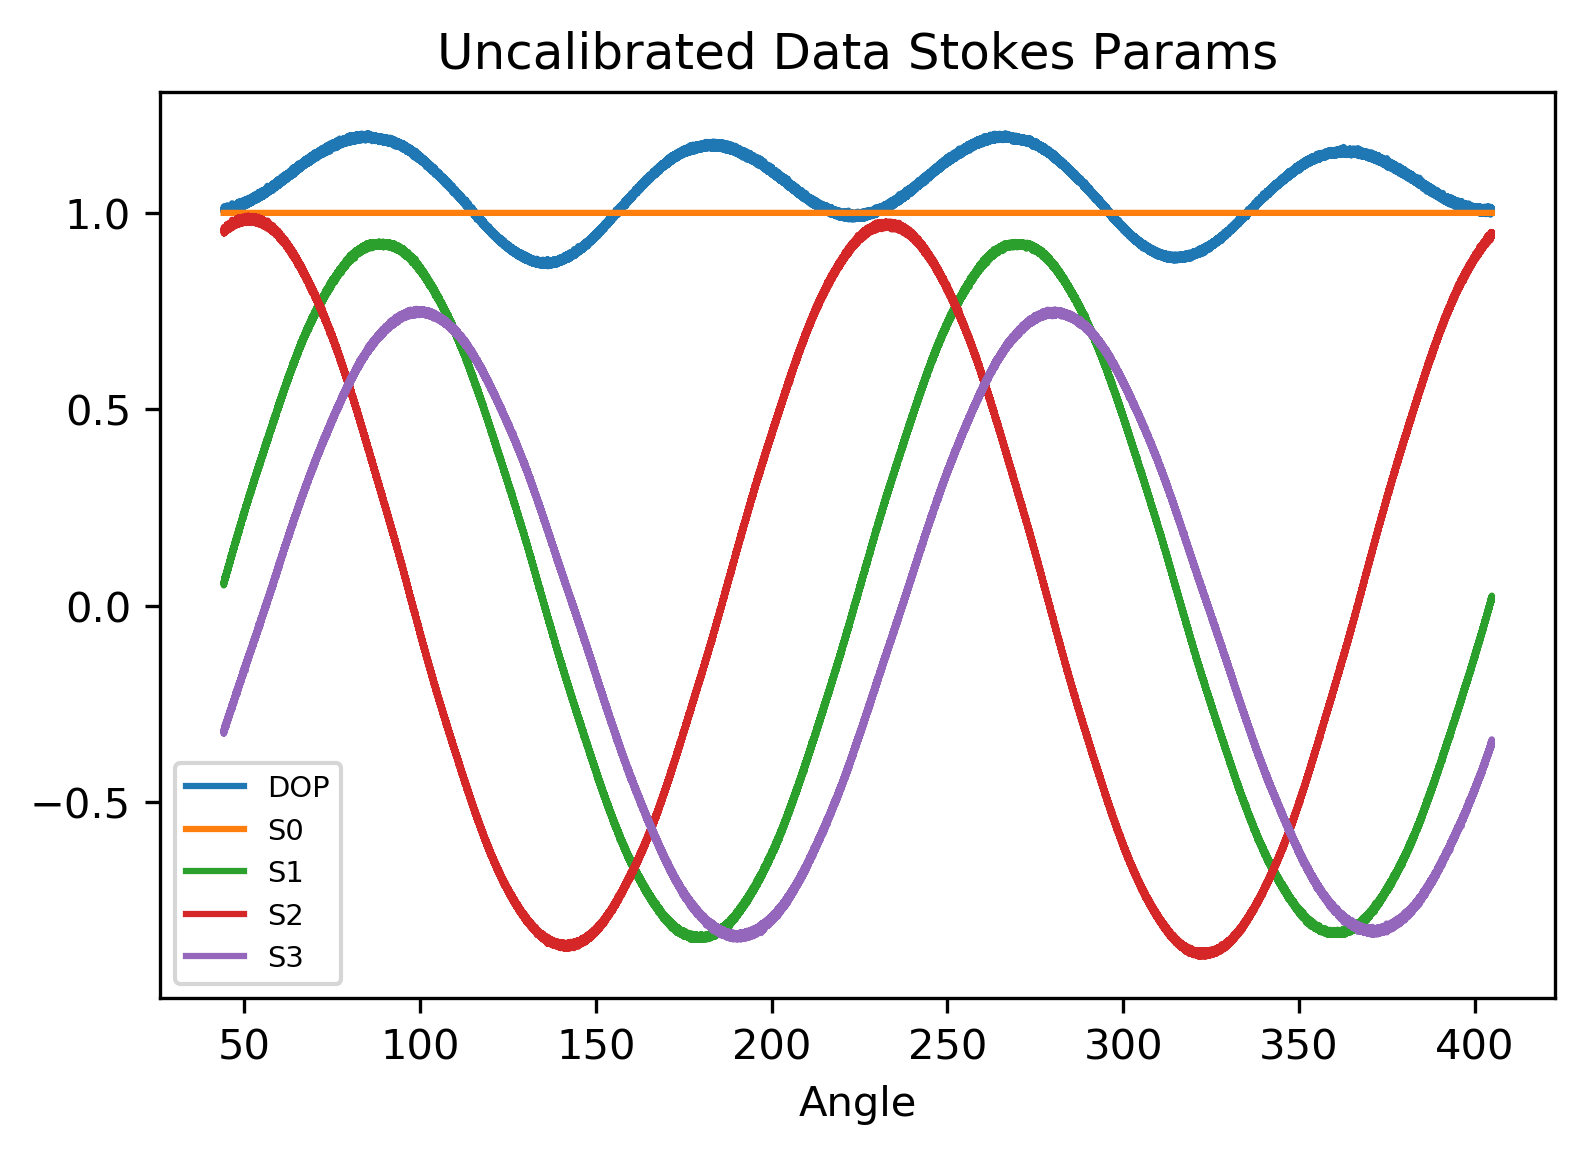

In [49]:
#This cell calculates the stokes parameters assuming the detector is ideal
plt.figure(dpi=300)
# x = avgArr[:,1]
# z = x - vertical
pStateArr = calcStokes(VArrCrop)
pStateArr = np.array(pStateArr)
labelArr = ["DOP","S0", "S1", "S2", "S3"]
for i in np.arange(0,5,1):
    plt.plot(PolAngle,pStateArr[:,i] , label = labelArr[i])
#plt.vlines([-45,0, 45, 90],-1, 1,linestyles='dashed', label = '45 deg intervals')
plt.title("Uncalibrated Data Stokes Params")
plt.xlabel("Angle")
plt.legend(fontsize='x-small')
#plt.savefig("UncalibratedStokesParams.png",bbox_inches='tight')

In [13]:
#This is the function I'm acutally using to fit the detector signals. It uses the intensity interpolation to get the 
#amplitude of the sine wave at each point
def linStateFitInterp(x, a,b,c):
    if len(x) > 0:
        for i in range(0,len(x)):
            if x[i] < 44.18:
                x[i] = x[i] +360
            if x[i] > 404.94:
                x[i] = x[i] - 360
    else:
        if x < 44.18:
            x = x +360
        if x > 404.94:
            x = x - 360
    I = Iinterp(x)
    x = x*np.pi/180
    return I*(a - b*np.cos(2*x) + c*np.sin(2*x))

I need to figure out some way to combined the intensity and polarization measurements to have one set of indexing angles. For now, I am going to just shorten the intensity data set and use the polarization angle set.

In [14]:
IArrCrop2 = IArrCrop[0:len(VArrCrop)]
IAngle2 = PolAngle

[array([ 0.56432636, -0.57174345, -0.0130545 ]), array([ 6.05969398e-01,  6.00333221e-01, -4.79863942e-04]), array([0.68366235, 0.15906873, 0.5905883 ]), array([ 0.63735799, -0.15321727, -0.60323816]), array([ 0.78608161, -0.55280194,  0.17181258]), array([ 0.72164819,  0.43193887, -0.20021863])]
------------------------------------------------------
[array([8.59291901e-11, 1.70556225e-10, 1.71971778e-10]), array([7.51237307e-11, 1.49109052e-10, 1.50346607e-10]), array([6.88346255e-11, 1.36626147e-10, 1.37760091e-10]), array([9.27667308e-11, 1.84127695e-10, 1.85655885e-10]), array([9.52098370e-11, 1.88976882e-10, 1.90545319e-10]), array([9.78750708e-11, 1.94266963e-10, 1.95879305e-10])]
------------------------------------------------------
[array([ 1.52268611e-10, -2.98309014e-10, -1.31733678e-08]), array([ 1.23972813e-10,  2.48377147e-10, -3.13310906e-07]), array([1.00685120e-10, 8.58912662e-10, 2.33259093e-10]), array([ 1.45548863e-10, -1.20174243e-09, -3.07765484e-10]), array([ 1.2

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


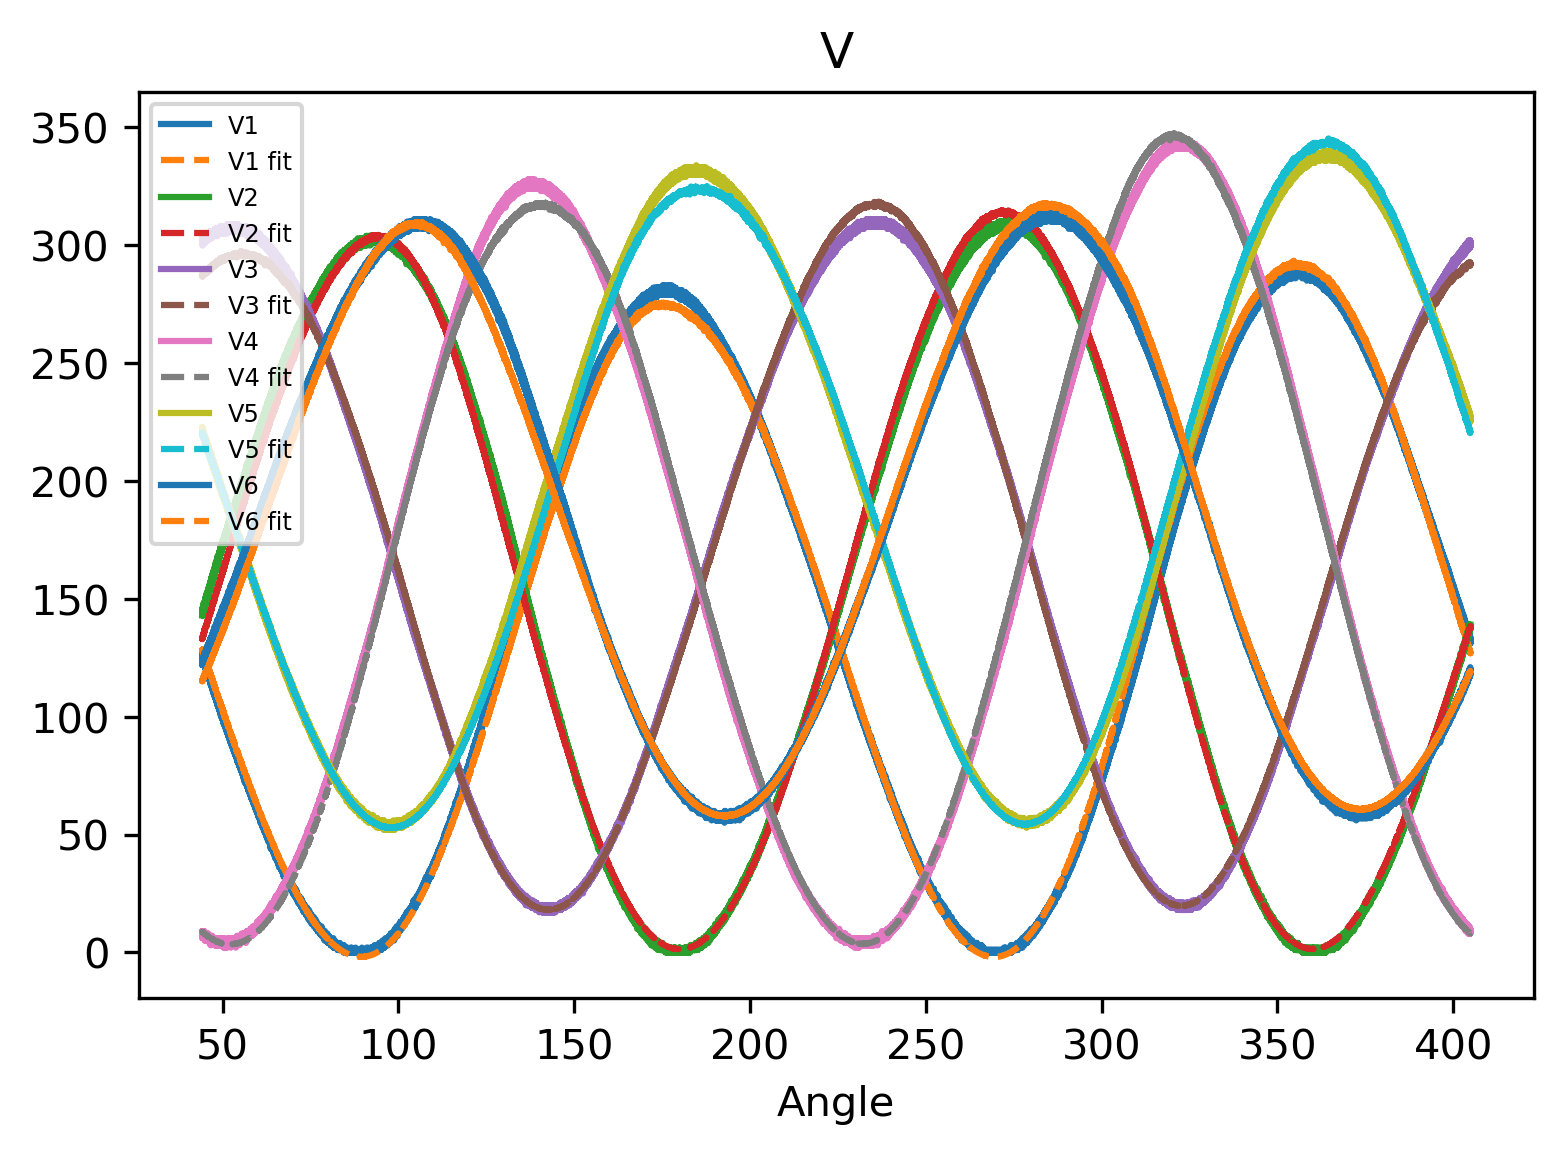

In [15]:
#V fitting
#This cell uses the fitting function that interpolates the intensity data for a better fit.
ParamsArr = []
sigmaArr = []
divArr = []
plt.figure(dpi=300)
for i in np.arange(0,6,1):
    params = ss.curve_fit(linStateFitInterp, PolAngle, VArrCrop[:,i])
    ParamsArr.append(params[0])
    sigmaArr.append(np.diagonal(params[1]))
    divArr.append(np.diagonal(params[1]/params[0]))
    a,b,c = params[0]
    plt.plot(PolAngle, VArrCrop[:,i], label="V{0}".format(i+1))
    plt.plot(PolAngle,linStateFitInterp(PolAngle,a,b,c), '--',label="V{0} fit".format(i+1))

plt.title("V")
#plt.text(50,.63, "y = {0:.3} + {1:.3}sin(2x)+ {2:.3}cos(2x)".format(a,b,c))
plt.xlabel("Angle")
#plt.legend(bbox_to_anchor=(1.1, 1))
plt.legend(fontsize='xx-small')
#plt.savefig("FittingtoVoltages.png", bbox_inches='tight')
print(ParamsArr)
print("------------------------------------------------------")
print(sigmaArr)
print("------------------------------------------------------")
print(divArr)

In [16]:
def normalize(pState):
    if np.ndim(pState) !=1:
        stateArr = []
        for i in np.arange(0,len(pState),1):
            curpState = pState[i]
            stateArr.append(normalize(curpState))
        result = stateArr
    else:
        S0, S1, S2, S3 = pState
        result = [1, S1/S0, S2/S0, S3/S0]
    return np.array(result)

In [17]:
def angleToStokes(angle):
    if np.shape(angle) != ():
        StateArr = []
        for x in angle:
            curState = angleToStokes(x)
            StateArr.append(curState)
        state = StateArr
    else:
        S0 = 1
        S1 = -np.cos(2*angle *np.pi/180)
        S2 = np.sin(2*angle *np.pi/180)
        S3= 0 
        state = S0, S1, S2, S3
    return np.array(state)

In [18]:
def getDOP(pState):
    if np.shape(pState) != (4,):
        DOPArr = []
        for curState in pState:
            curDOP = getDOP(curState)
            DOPArr.append(curDOP)
        Result = DOPArr
    else:
        S0, S1, S2, S3 = pState
        DOP = (S1**2 + S2**2 + S3**2)**0.5/S0
        Result = DOP
    return Result

In [19]:
def cost(pState, controlState):
    if np.ndim(pState) != 1:
        return np.linalg.norm(np.subtract(pState, controlState), axis = 1)
    else:
        return np.linalg.norm(np.subtract(pState, controlState))
    #Distance b/w mapped state and control state in Stokes Space
    
def angleDiff(pState, controlState):
    if np.ndim(pState) != 1:
        angleArr = []
        for i in np.arange(0,len(pState),1):
            curpState = pState[i]
            curcontrolState = controlState[i]
            angleArr.append(angleDiff(curpState, curcontrolState))
       
        result = angleArr
    else:
        Dot = np.dot(pState, controlState)
        A = np.linalg.norm(pState)
        B = np.linalg.norm(controlState)
        result = np.arccos(Dot/(A*B))*180/np.pi
    
    return result
        

In [20]:
#Read in Circular States and do the averaging
#read in diode measurements and total intensity for first left handed circular state
dfLH1 = pd.read_csv("1550_Calib_LHCir1_Pol8:5:19:12:43.csv", header=None)
dfLH1I = pd.read_csv("1550_Calib_LHCir1_Int8:5:19:11:45.csv", header = None)
#read in diode measurements and total intensity for second left handed circular state
dfLH2 = pd.read_csv("1550_Calib_LHCir2_Pol8:5:19:13:47.csv", header = None)
dfLH2I = pd.read_csv("1550_Calib_LHCir2_Int8:5:19:10:59.csv", header = None)
display(dfLH1)
dfLH = pd.concat([dfLH1, dfLH2], ignore_index = True)
dfLHI = pd.concat([dfLH1I, dfLH2I], ignore_index= True)
#display(dfLHI)
LHIArr = dfLHI.to_numpy()[:,1]
LHArr = dfLH.to_numpy()
LHArr = LHArr[:,1:7]
#print(len(LHArr))
LHArr = LHArr[~np.isnan(LHArr).any(axis=1)]
LH = np.mean(LHArr, axis = 0)
LHI = np.mean(LHIArr, axis = 0)
print(LH)
print(LHI)



dfRH1 = pd.read_csv("1550_Calib_RHCir1_Pol8:5:19:15:37.csv", header = None)
dfRH1I = pd.read_csv("1550_Calib_RHCir1_Int8:5:19:7:35.csv", header = None)
#display(dfRH1I)
#read in diode measurements and total intensity for second left handed circular state
dfRH2 = pd.read_csv("1550_Calib_RHCir2_Pol8:5:19:14:18.csv", header = None)
dfRH2I = pd.read_csv("1550_Calib_RHCir2_Int8:5:19:9:29.csv", header = None)
#display(dfRH2I)
dfRH = pd.concat([dfRH1, dfRH2], ignore_index = True)
dfRHI = pd.concat([dfRH1I, dfRH2I], ignore_index= True)
#display(dfRHI)
RHIArr = dfRHI.to_numpy()[:,1]
RHArr = dfRH.to_numpy()
RHArr = RHArr[:,1:7]
RHArr = RHArr[~np.isnan(RHArr).any(axis=1)]
RH = np.mean(RHArr, axis = 0)
RHI = np.mean(RHIArr, axis=0)
print(RH)
print(RHI)

lastCol = 1/2*(LH/LHI - RH/RHI)
print(lastCol)
lastCol = np.array(lastCol)
lastCol = np.transpose([lastCol])
instrumentArr = np.append(ParamsArr,lastCol, axis = 1)
B = np.matrix(instrumentArr)
display(B)
Bdagger = B.H

Binv = np.linalg.inv(np.matmul(Bdagger,B))
Binv = np.matmul(Binv, Bdagger)
display(Binv)

,0,1,2,3,4,5,6
0,554010000,308,293,287,249,135,584
1,554010104,308,293,287,249,134,585
2,554010209,308,293,287,249,135,584
3,554010314,308,293,288,249,135,585
4,554010420,308,293,286,249,135,584
...,...,...,...,...,...,...,...
29995,557166590,308,293,287,249,135,584
29996,557166695,308,294,286,250,135,585
29997,557166801,308,293,287,249,135,584
29998,557166906,308,293,286,249,135,584


[291.02435    307.56593333 306.11861667 240.69923333 103.37995
 463.27715   ]
725.2146166666666
[285.06786667 315.96755    257.96491667 290.68515    478.6955
  67.45178333]
722.3982666666667
[ 0.00334047 -0.00664179  0.03250624 -0.03524418 -0.2600484   0.27272092]


matrix([[ 5.64326356e-01, -5.71743450e-01, -1.30545036e-02,
          3.34046945e-03],
        [ 6.05969398e-01,  6.00333221e-01, -4.79863942e-04,
         -6.64179340e-03],
        [ 6.83662347e-01,  1.59068730e-01,  5.90588302e-01,
          3.25062361e-02],
        [ 6.37357991e-01, -1.53217271e-01, -6.03238164e-01,
         -3.52441773e-02],
        [ 7.86081607e-01, -5.52801936e-01,  1.71812575e-01,
         -2.60048397e-01],
        [ 7.21648186e-01,  4.31938868e-01, -2.00218632e-01,
          2.72720922e-01]])

matrix([[ 0.19413216,  0.24124604,  0.25528774,  0.23542116,  0.28297409,
          0.27331806],
        [-0.78820545,  0.87125841,  0.02271854,  0.03097218, -0.0960772 ,
         -0.05944514],
        [ 0.1104432 , -0.14219683,  0.79315733, -0.81863442,  0.10269772,
         -0.10722189],
        [ 1.53525503, -1.69411233,  0.52438305, -0.61879786, -1.56278763,
          1.97404885]])

In [21]:
#This cell uses the matrix calculated from just both RH and Lh states and looks at the calibrated
#measurements of the RH and LH astates 
mappedLState = np.matmul(Binv,LH)
mappedRState = np.matmul(Binv,RH)
print(mappedLState)
print(mappedRState)
normL = mappedLState/mappedLState[0,0]
normR = mappedRState/mappedRState[0,0]
normL = (np.asarray(normL).flatten())
normR = (np.asarray(normR)).flatten()
print(normL)
print(normR)

[[421.38613343  15.51994318  -4.89425872 690.29542176]]
[[ 419.74969257   15.45967193   -4.87525201 -757.18185389]]
[ 1.          0.03683069 -0.01161466  1.6381541 ]
[ 1.          0.03683069 -0.01161466 -1.803889  ]


In [37]:
firstCol = 1/2*(LH/LHI + RH/RHI)
print(firstCol)
#print(B)
print(B[:,0])
ratioArr = []
for i in range(len(firstCol)):
    ratioArr+=B[i,0]/firstCol[i]

print("{:.2f}".format(B[i,0]/firstCol[i]))

[0.39795363 0.43074512 0.38960139 0.36714487 0.40259923 0.36609294]
[[0.56432636]
 [0.6059694 ]
 [0.68366235]
 [0.63735799]
 [0.78608161]
 [0.72164819]]
1.97


[0.00643574 0.0057457  0.00183717 ... 0.00552043 0.00552043 0.00496162]


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


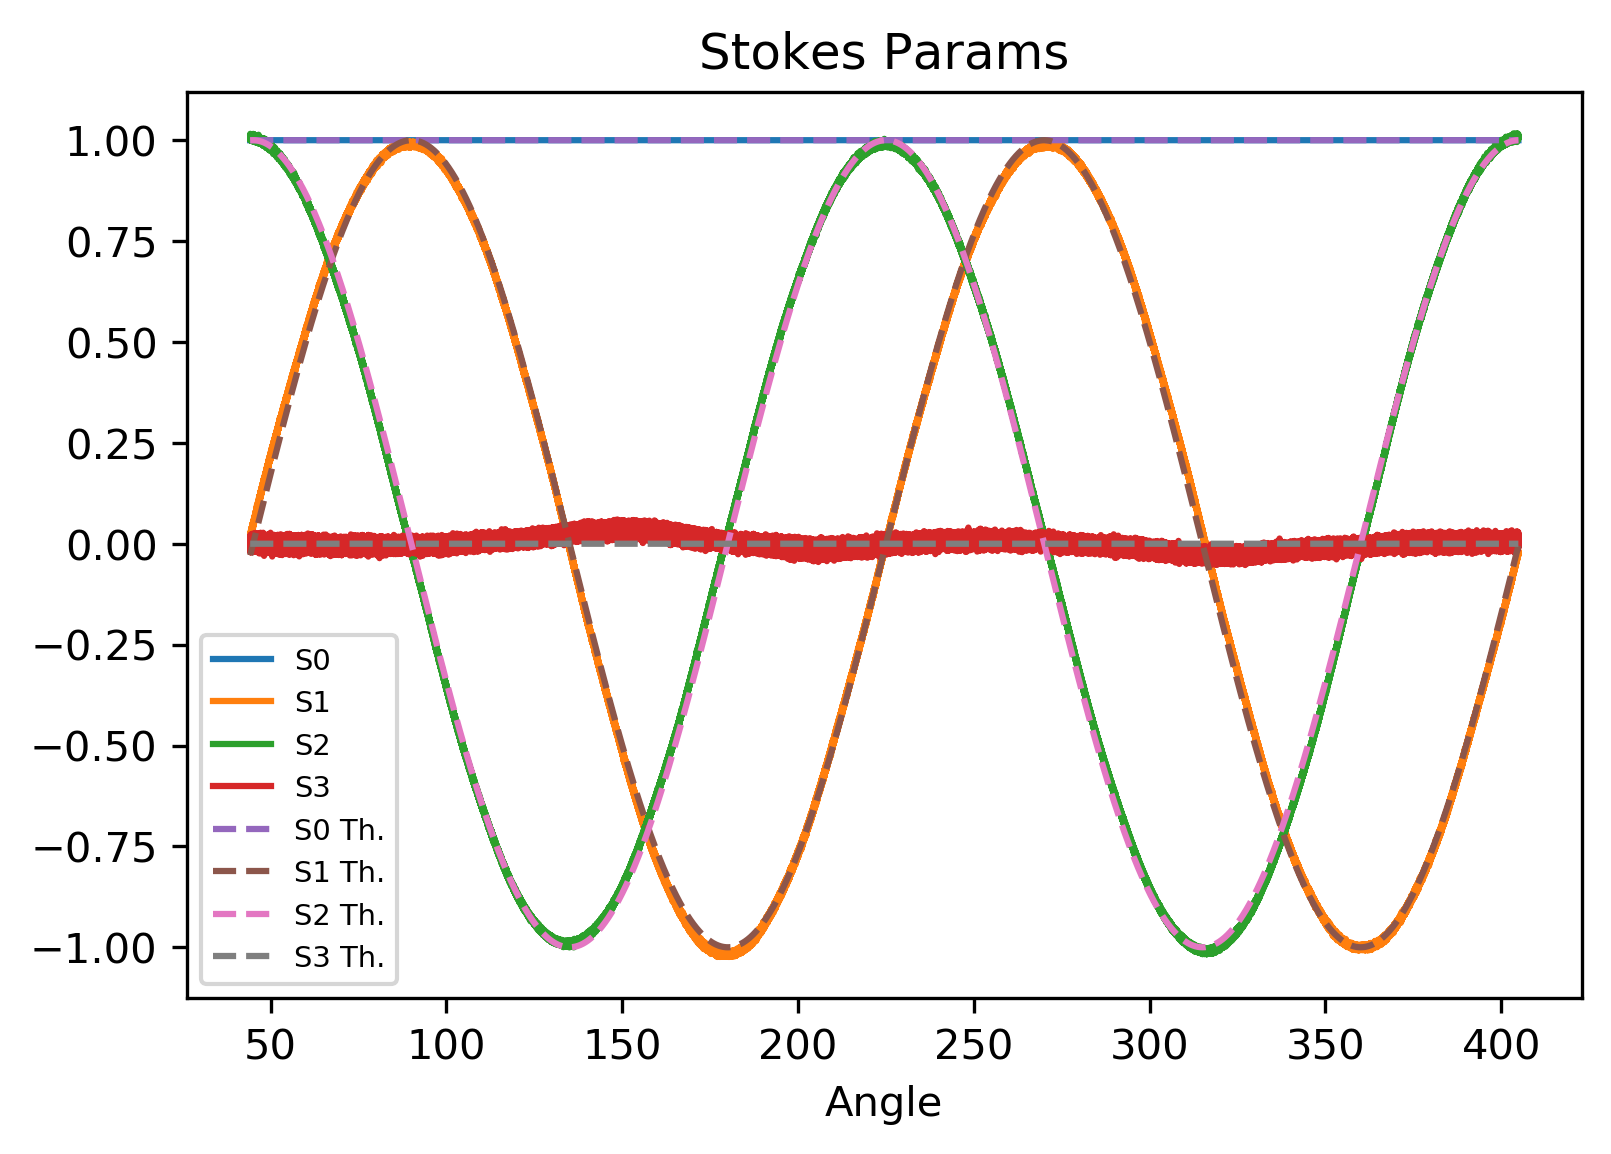

In [57]:
x = PolAngle
vStateArr = VArrCrop
mappedStates = []
for vState in vStateArr:
    mappedState = np.matmul(Binv, vState)
    mappedState = np.squeeze(np.asarray(mappedState))
    mappedStates.append(mappedState)


pStateArr = mappedStates
pStateArr = np.array(pStateArr)
normStates = normalize(pStateArr)
print(normStates[:,3])
#print(pStateArr)
#print(pStateArr[0])

THStates = angleToStokes(x)

'''
plt.figure(dpi=300)
for i in np.arange(0,4,1):
    plt.plot(z,pStateArr[:,i], label = "S{0}".format(i))
plt.title("Stokes Params")
plt.xlabel("Angle")
plt.vlines([0, 45], -300, 300)
plt.legend(bbox_to_anchor=(1.1, 1))
#plt.savefig("CalibratedStokesPsuedoInverseParam.png", bbox_inches='tight')
'''

plt.figure(dpi=300)
for i in np.arange(0,4,1):
    plt.plot(x,normStates[:,i], label = "S{0}".format(i))
for i in np.arange(0,4,1):
    plt.plot(x,THStates[:,i], "--", label = "S{0} Th.".format(i))
    
plt.title("Stokes Params")
plt.xlabel("Angle")
plt.legend(fontsize='x-small')
#plt.savefig("CalibratedStokesRectInstrMatrix.png", bbox_inches='tight')



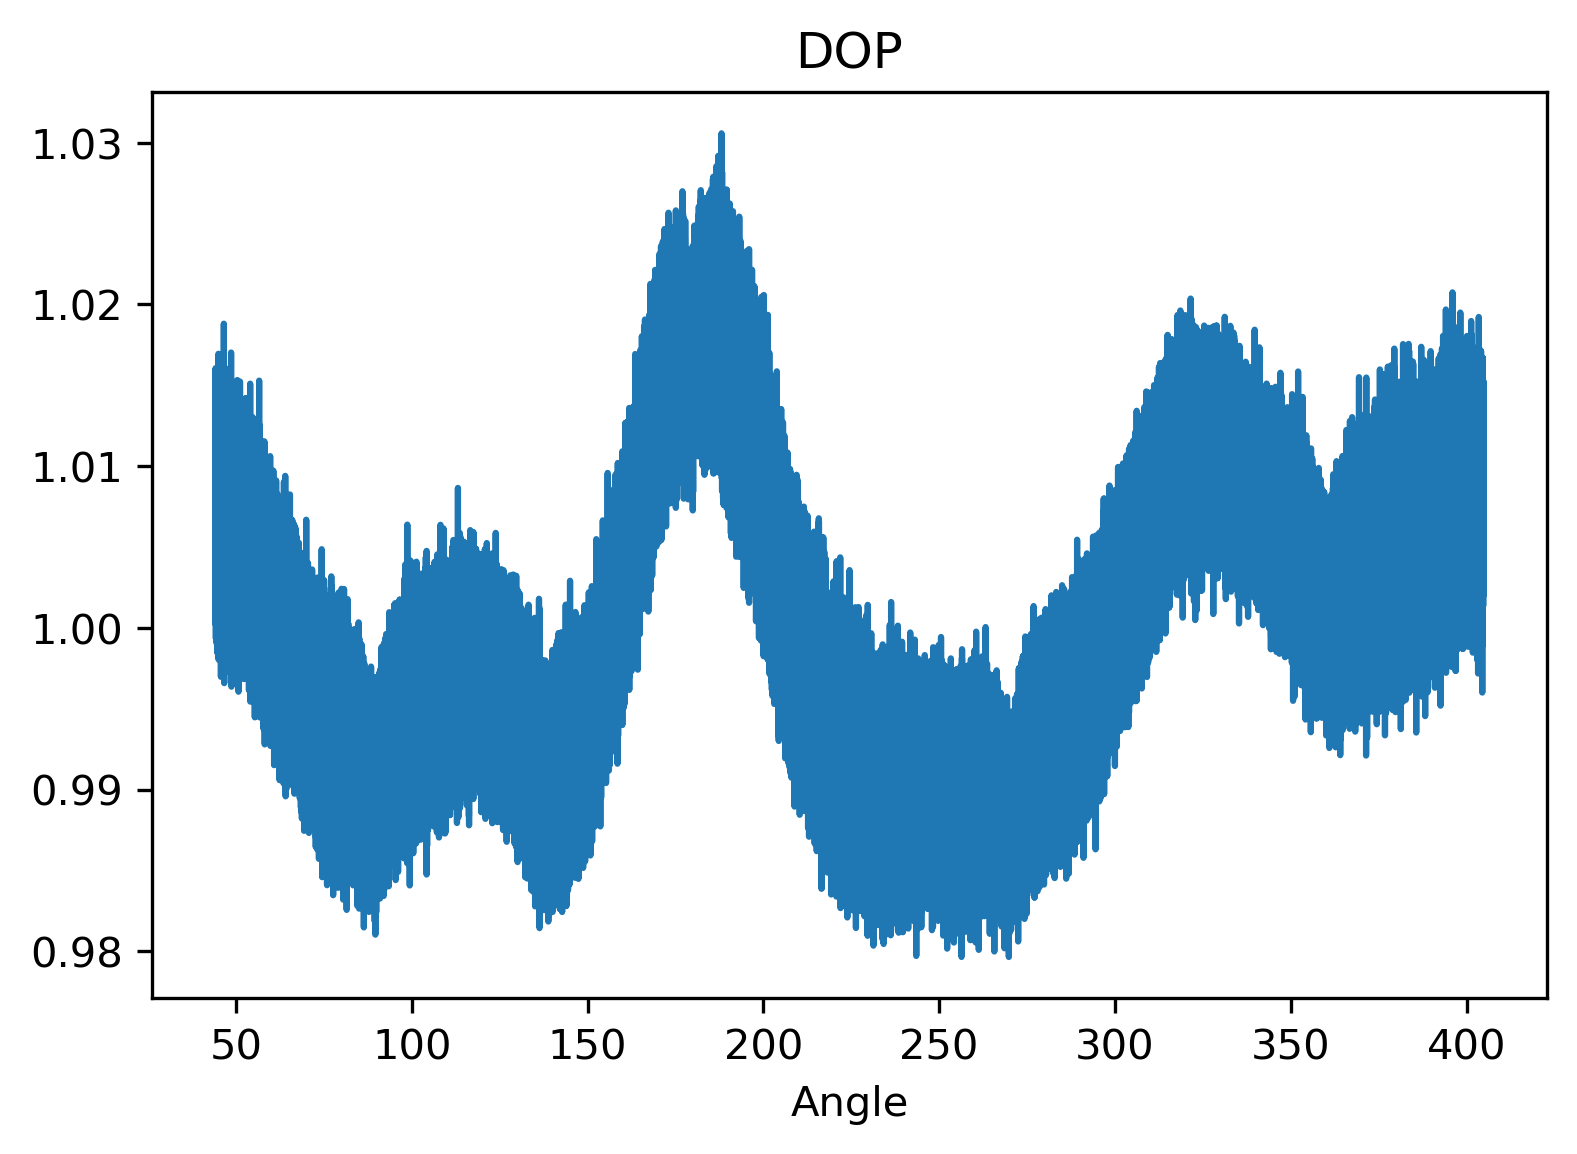

In [61]:
plt.figure(dpi=300)
plt.title("DOP")
plt.xlabel("Angle")
#plt.ylim([0.5,1.5])
plt.plot(x,getDOP(normStates))
#plt.savefig("CalibratedStokesRectInstrMatrixDOP.png", bbox_inches='tight')

[ 44.18        44.18010044  44.18020184 ... 404.86209772 404.86219816
 404.86229956]


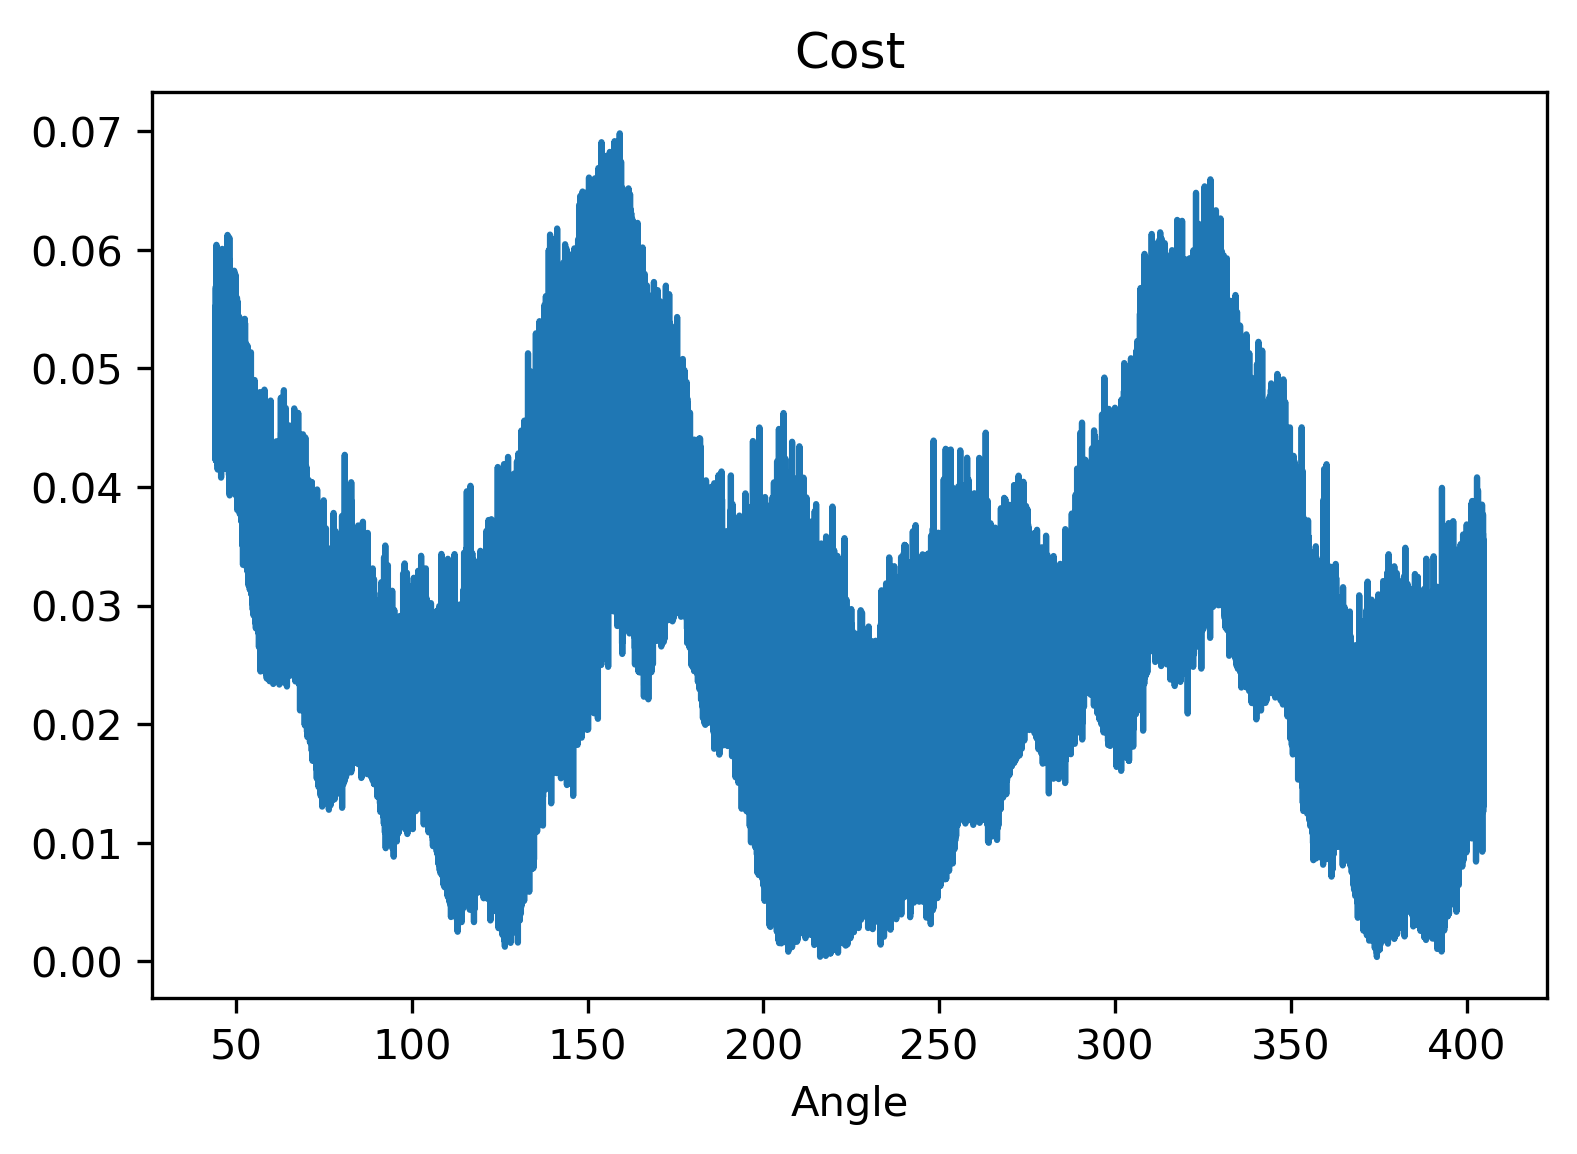

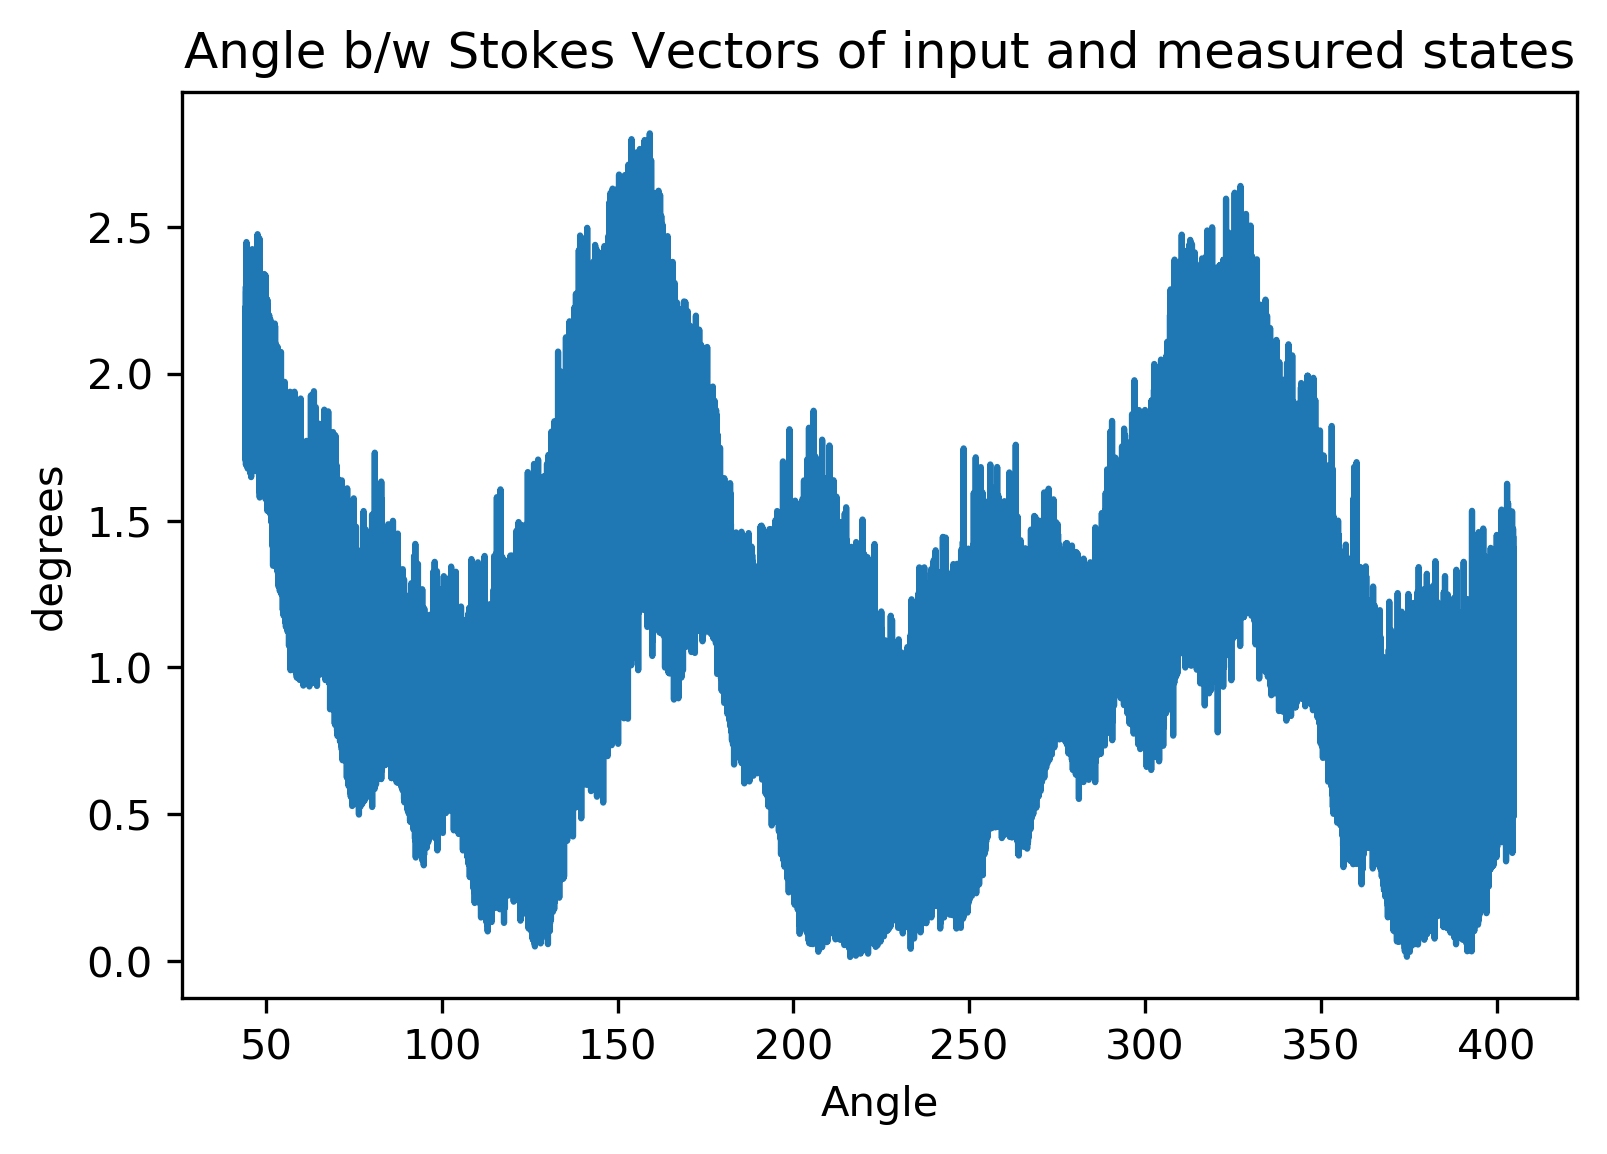

In [63]:
plt.figure(dpi=300)
plt.title("Cost")
plt.xlabel("Angle")
plt.plot(x,cost(normStates, angleToStokes(x)))
#plt.savefig("CalibratedStokesParamPsuedoInverseCost.png", bbox_inches='tight')
print(x)
plt.figure(dpi=300)
plt.title("Angle b/w Stokes Vectors of input and measured states")
plt.xlabel("Angle")
plt.ylabel('degrees')
plt.plot(x,angleDiff(normStates, angleToStokes(x)))
#plt.savefig("CalibratedStokesRectInstrMatrixngleDiff.png", bbox_inches='tight')


In [68]:
S0lin = pStateArr[:,0]
Ilin = Iinterp(x)
Rlin = S0lin/Ilin
print(Rlin)


[1.03468678 1.03661323 1.03471255 ... 1.02272564 1.02238679 1.02220497]


In [76]:
S0LH = mappedLState[0,0]
S0RH = mappedRState[0,0]
RLH = S0LH/LHI
RRH = S0RH/RHI
print(RLH)
print(RRH)

0.5810502487823976
0.5810502487823977


In [77]:
print(mappedLState[0,0])
print(LHI)

421.3861334347978
725.2146166666666


In [78]:
S0LH = mappedLState[0,3]
S0RH = mappedRState[0,3]
RLH = S0LH/LHI
RRH = S0RH/RHI
print(RLH)
print(RRH)

0.9518498467860768
-1.0481501532139237


In [79]:
print(mappedLState)
print(LHI)

[[421.38613343  15.51994318  -4.89425872 690.29542176]]
725.2146166666666


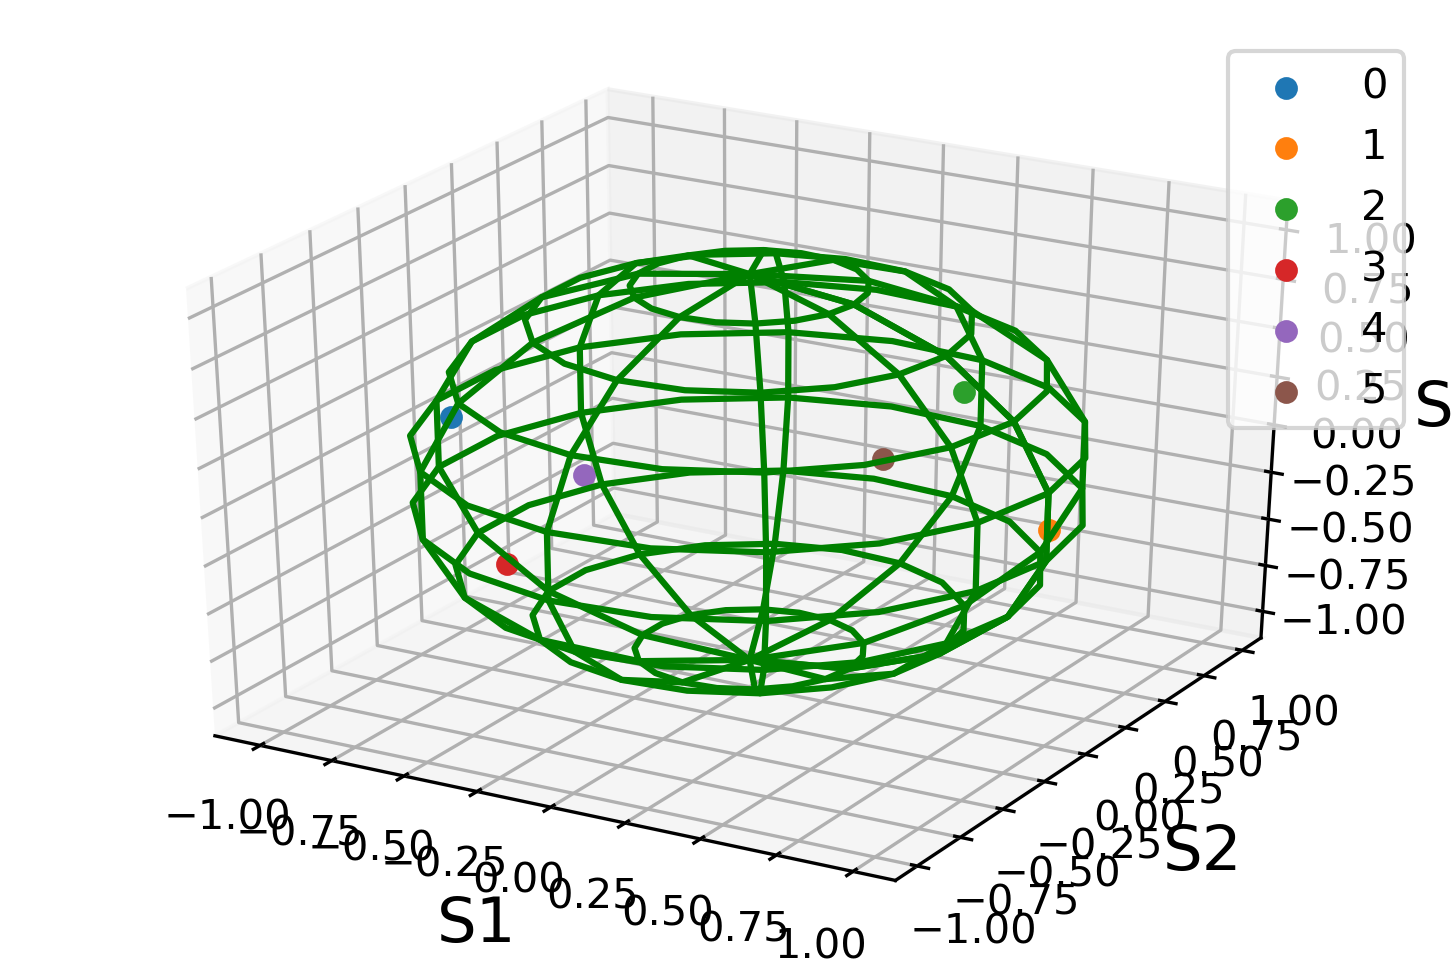

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

fig = plt.figure(dpi=300)
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="g", rcount = 10, ccount = 10)
ax.set_xlabel("S1", fontsize = 15)
ax.set_ylabel("S2", fontsize = 15)
ax.set_zlabel("S3", fontsize = 15)
for i in range(6):
    S0 = B[i,0]
    S1 = B[i,1]
    S2 = B[i,2]
    S3 = B[i,3]
    ax.scatter(S1/S0,S2/S0,S3/S0, label = "{}".format(i))
plt.legend()


In [39]:
print(B[0,:])

[[ 0.56432636 -0.57174345 -0.0130545   0.00334047]]
